## Importing Necessary libraries

In [1]:
import os # for basic os operations
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for visuvalizations
import seaborn as sns
import warnings # to ignoring warnings throughout project
from IPython.display import Image , display # for displaying images
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from lightgbm import LGBMRegressor
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , precision_recall_curve , roc_auc_score , roc_curve

In [2]:
os.getcwd() # check current directory

'C:\\Users\\KISHORE\\Project 3'

In [3]:
os.chdir("C:/Users/KISHORE/Downloads") # changed to downloads directory , images are present in that directory

Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan.

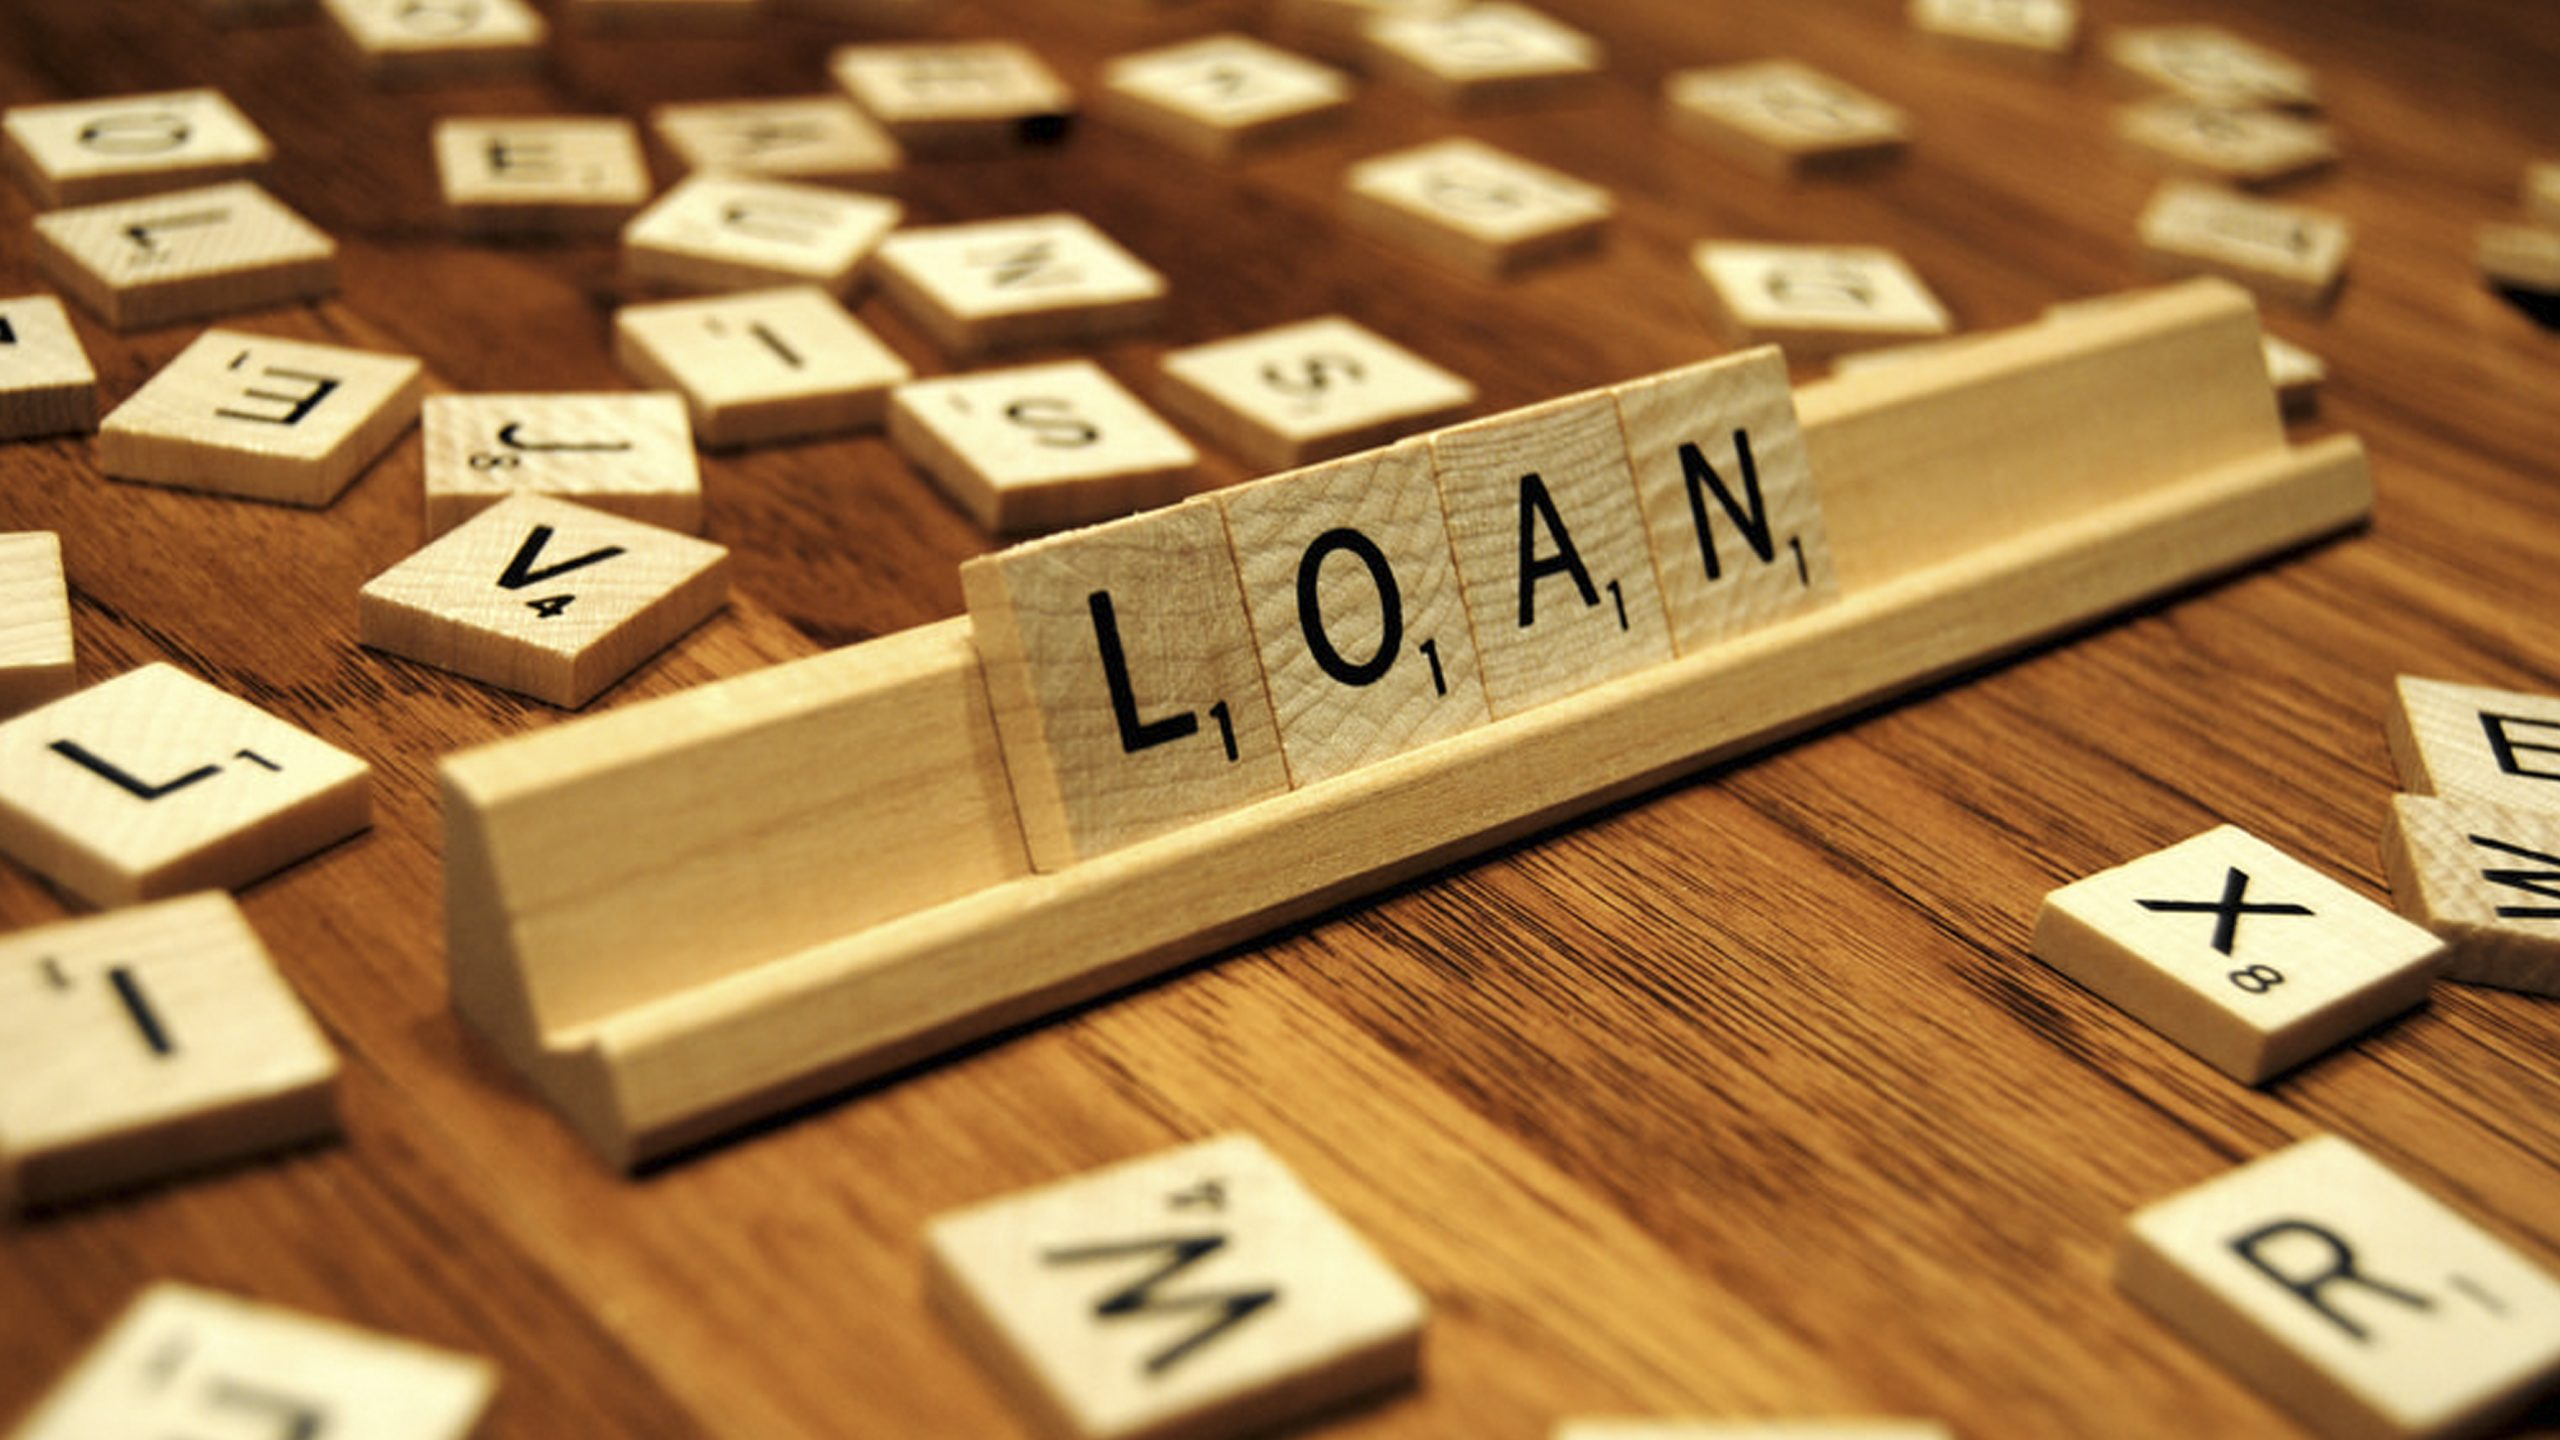

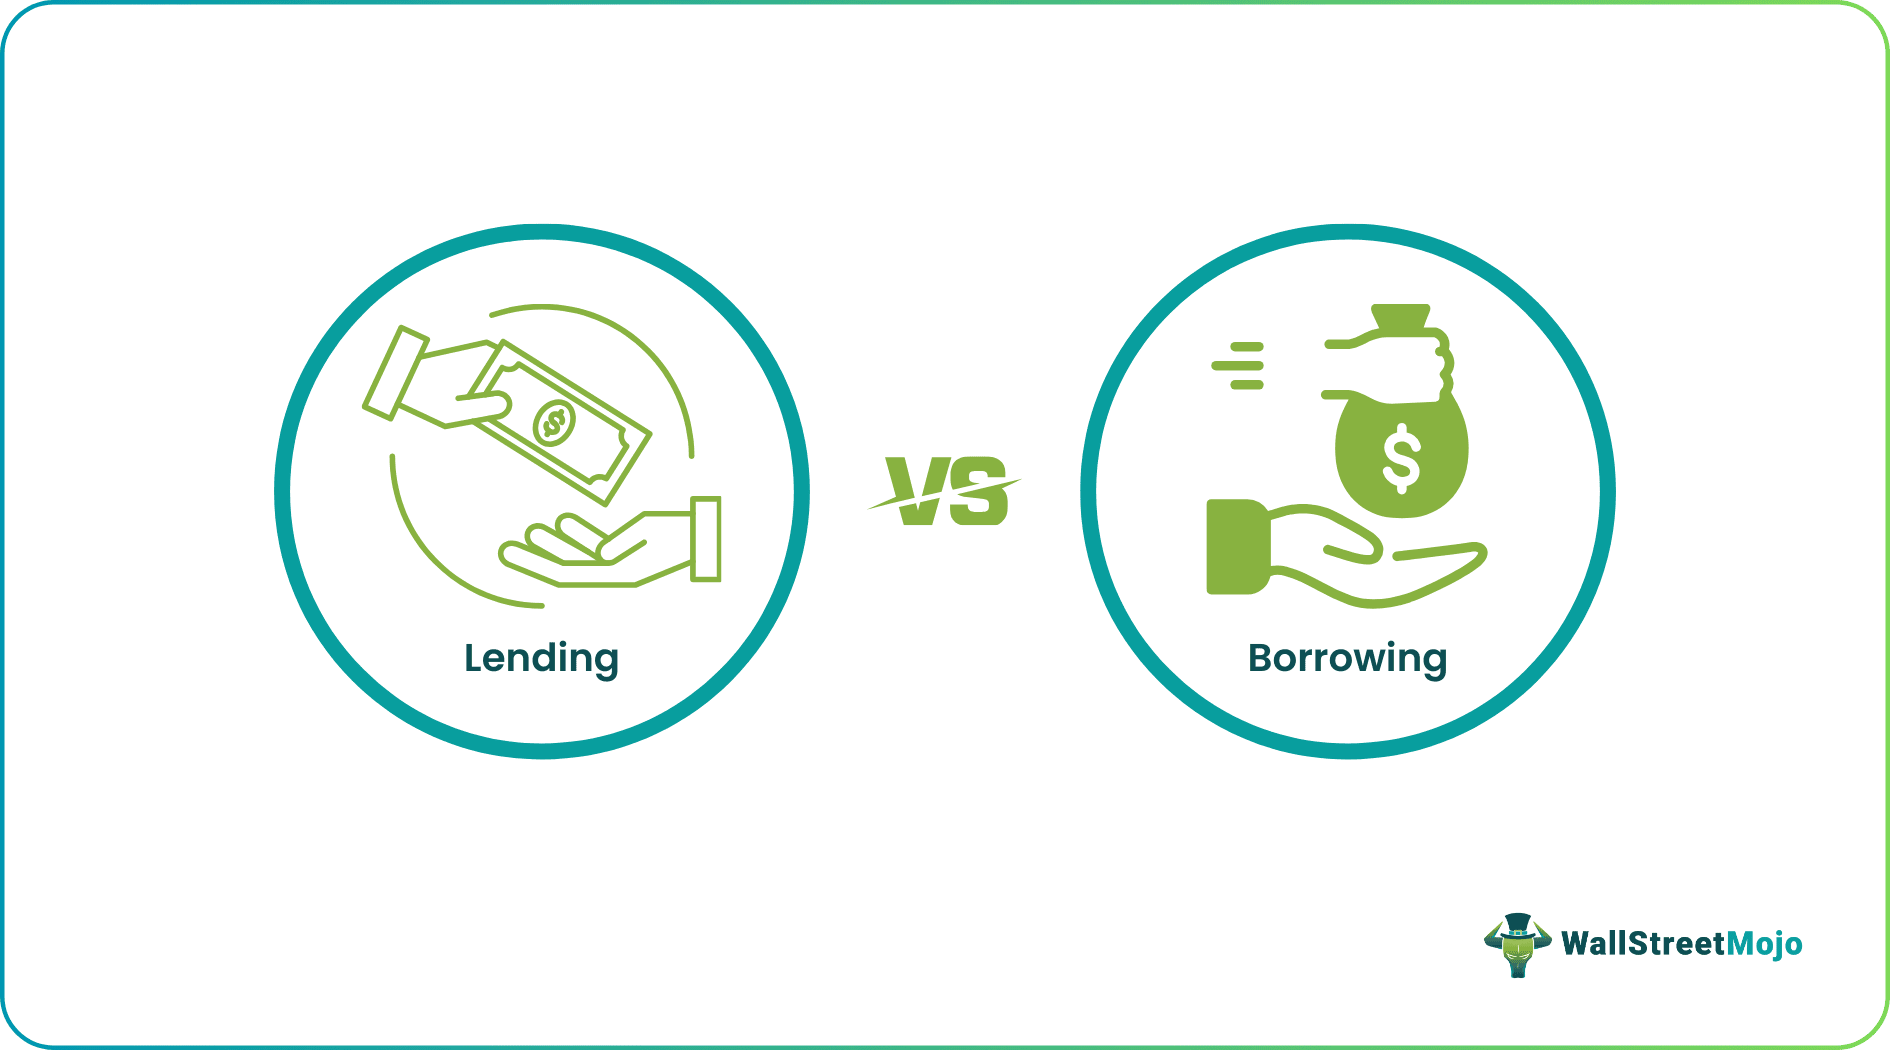

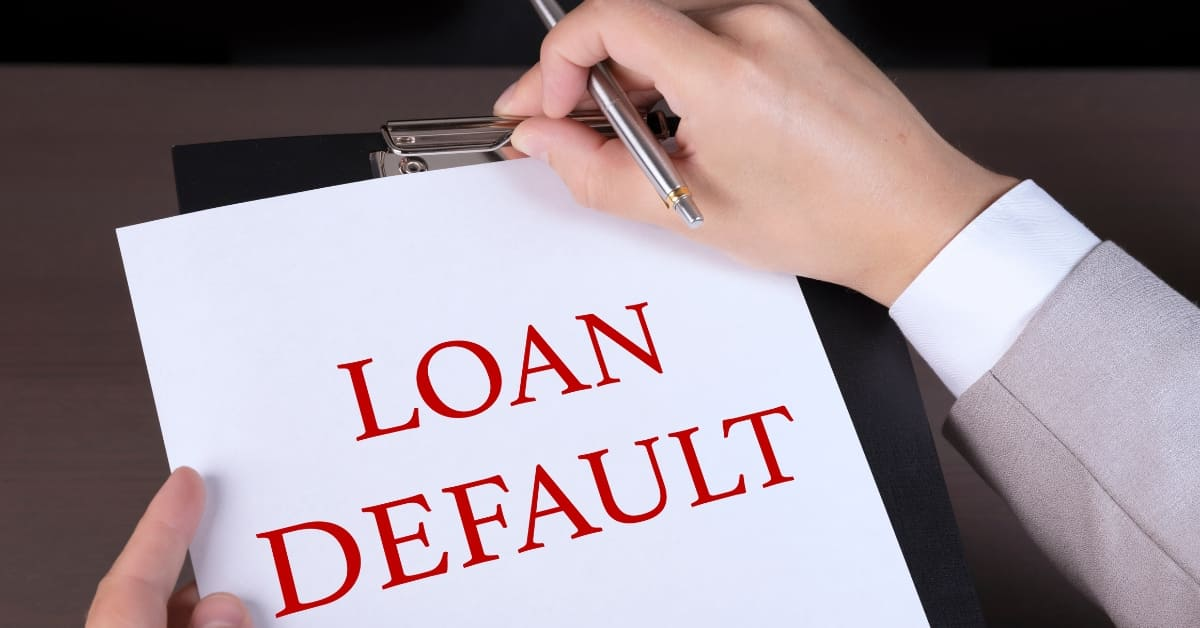

In [4]:
display(Image(filename = "dl_loan-scaled.jpg", width = 400 , height = 300))
display(Image(filename = "Lending-vs-Borrowing-Differences.png" , width = 400 , height = 300))
display(Image(filename = "What-is-loan-default-and-why-should-you-avoid-it.jpg" , width = 500 , height = 400))

In [5]:
warnings.filterwarnings("ignore") #this ingore all type of warnings throughout notebook

In [6]:
# setting basic seaborn visuval themes settings
sns.set_theme(
    style = "whitegrid",
    palette = "colorblind",
    context = "notebook"
)

In [7]:
# setting plot of matplotlib
plt.style.use("seaborn-v0_8") # this is useful for working with both seaborn and matplotlib togethore , and better visuval experiance

plt.rcParams.update({
    "axes.titlesize" : 12,
    "axes.labelsize" : 8,
    "axes.grid" : True,
    "font.size" : 4,
    "lines.linewidth" : 3
})

In [8]:
# seting numpy , pandas floting point prection for better reprecentation
np.set_printoptions(precision = 4 , suppress = True)

pd.set_option("display.float_format" , "{:.4f}".format)

## Loading dataset and Exploration

In [9]:
os.getcwd()

'C:\\Users\\KISHORE\\Downloads'

In [10]:
os.chdir("C:/Users/KISHORE/Downloads/loan_default.csv")

In [11]:
loan_data = pd.read_csv("loan_default.csv") #loading loan default dataset

In [12]:
loan_data.head() # see firt 5 reconds of the dataset

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.7288,south,direct,1,45.0000
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.0197,south,direct,0,46.0000
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.3769,North,direct,0,42.0000
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.8865,North,direct,0,39.0000


In [13]:
loan_data.shape # shape of the dataset

(148670, 34)

In [14]:
loan_data.info() # see basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Data Preprocessing

In [15]:
loan_data.columns # get dataset columns as a list

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [16]:
loan_data[loan_data.duplicated()] #print duplicate records if they present in dataset

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1


- here we see there is no duplicate record in dataset. So we free to move to dealing with null values.

#### Handling Missing Values

In [17]:
loan_data.isnull().sum() # print count of records with null values in each column

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

- more columns are have null values
- we have large number of records in dataset , so instead of counting null record we can see as percentages for better interpretation

In [18]:
r , c = loan_data.shape
null_percentage = (loan_data.isnull().sum() / r) * 100 # percentage of null values in each column
print(f"Percentage of Null value : {null_percentage}")

Percentage of Null value : ID                           0.0000
year                         0.0000
loan_limit                   2.2493
Gender                       0.0000
approv_in_adv                0.6107
loan_type                    0.0000
loan_purpose                 0.0901
Credit_Worthiness            0.0000
open_credit                  0.0000
business_or_commercial       0.0000
loan_amount                  0.0000
rate_of_interest            24.5100
Interest_rate_spread        24.6445
Upfront_charges             26.6644
term                         0.0276
Neg_ammortization            0.0814
interest_only                0.0000
lump_sum_payment             0.0000
property_value              10.1554
construction_type            0.0000
occupancy_type               0.0000
Secured_by                   0.0000
total_units                  0.0000
income                       6.1546
credit_type                  0.0000
Credit_Score                 0.0000
co-applicant_credit_type     0.0000
a

- here columns **rate_of_interest , Interest_rate_spread , Upfront_charges** are have high percentage of null values >20%
- remaining columns shuch as **loan_limit , approv_in_adv , loan_purpose , term , Neg_ammortization , property_value , income , age , submission_of_application , LTV , dtir1** are have <17% 

In [19]:
total_null_percentage = (loan_data.isnull().sum().sum() / loan_data.size ) * 100 # total percentage of null recors in dataset
print(f"total Percentage of Null value : {total_null_percentage}")

total Percentage of Null value : 3.583439833187597


- there less percentage of null records in overal dataset size ~5054780
- we can't drop directly becouse most of columns are very importent for forther analysis and modeling , if drop may be important data we will lose. So We need to use **imputation method**

In [42]:
loan_data.replace([np.inf , - np.inf] , np.nan , inplace = True) #this will replace all occurence of inf , - inf values in dataset than they replaced as null

In [22]:
loan_data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.7288,south,direct,1,45.0000
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.0197,south,direct,0,46.0000
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.3769,North,direct,0,42.0000
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.8865,North,direct,0,39.0000


- we will observe the columns woth null values , misingness is depands on observed data only , there is no proper like relationships or influancing factors to each other.
- So the missingness is in **Missing At Random (MAR)**
- Hence we need to use **Multivariate Imputation by Chained Equations (MICE)** method

#### MICE With LGBMRegressor (Fast and accurate)

In [39]:
cat_cols = loan_data.select_dtypes(include='object').columns

In [24]:
encoder = OrdinalEncoder()

loan_data[cat_cols] = encoder.fit_transform(loan_data[cat_cols]) # encoding categorical column into numerical using ordinal encoder

In [25]:
loan_data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,...,3.0000,758,0.0000,0.0000,1.0000,98.7288,3.0000,1.0000,1,45.0000
1,24891,2019,0.0000,2.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,2.0000,552,1.0000,3.0000,1.0000,NaN,0.0000,1.0000,1,NaN
2,24892,2019,0.0000,2.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,...,3.0000,834,0.0000,1.0000,1.0000,80.0197,3.0000,1.0000,0,46.0000
3,24893,2019,0.0000,2.0000,0.0000,0.0000,3.0000,0.0000,0.0000,1.0000,...,3.0000,587,0.0000,2.0000,0.0000,69.3769,0.0000,1.0000,0,42.0000
4,24894,2019,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,...,1.0000,602,1.0000,0.0000,0.0000,91.8865,0.0000,1.0000,0,39.0000


In [ ]:
# this cell take more time to execute  , so ignore this.
'''
lgbm_imputer = IterativeImputer(
    estimator=LGBMRegressor(n_estimators=200),
    max_iter=10,
    random_state=42
)

loan_imputed = pd.DataFrame(
    lgbm_imputer.fit_transform(loan_data),
    columns=loan_data.columns
)
'''
#imputed null values and saving resultent dataframe as loan_imputed

In [27]:
'''
except original encoded values , the predicted new values (for filling null values)
those are need to in between the range of the column is encoded using ordinal encoder
'''

for i, col in enumerate(cat_cols): # cat_cols is list of categorical column names in the dataset
    loan_imputed[col] = np.clip(
        np.round(loan_imputed[col]),
        0,
        len(encoder.categories_[i]) - 1
    )


In [28]:
loan_imputed[cat_cols] = encoder.inverse_transform(loan_imputed[cat_cols]) # we simply inversing encoded categorical columns back to categorical

In [29]:
loan_imputed.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890.0000,2019.0000,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758.0000,CIB,25-34,to_inst,98.7288,south,direct,1.0000,45.0000
1,24891.0000,2019.0000,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552.0000,EXP,55-64,to_inst,82.2506,North,direct,1.0000,24.8547
2,24892.0000,2019.0000,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834.0000,CIB,35-44,to_inst,80.0197,south,direct,0.0000,46.0000
3,24893.0000,2019.0000,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587.0000,CIB,45-54,not_inst,69.3769,North,direct,0.0000,42.0000
4,24894.0000,2019.0000,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602.0000,EXP,25-34,not_inst,91.8865,North,direct,0.0000,39.0000


In [30]:
loan_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  float64
 1   year                       148670 non-null  float64
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  float64
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [9]:
os.chdir("C:/Users/KISHORE/Downloads")

In [10]:
#loan_imputed.to_csv("clean_loan_data.csv" , index = False)

In [11]:
cln_loan_data = pd.read_csv("clean_loan_data.csv")

In [12]:
cln_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   .                          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [13]:
cln_loan_data["Gender"].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [14]:
cln_loan_data["Gender"] = cln_loan_data["Gender"].replace("Sex Not Available" , np.nan)

In [15]:
cln_loan_data["Gender"].fillna(cln_loan_data["Gender"].mode()[0] , inplace = True)

In [16]:
cln_loan_data["Gender"].unique()

array(['Male', 'Joint', 'Female'], dtype=object)

#### Data Type Conversion & Formatting

In [17]:
cln_loan_data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', '.', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

In [18]:
cln_loan_data.columns = cln_loan_data.columns.str.strip() # it removes the extra white spacess in column names

In [19]:
cln_loan_data.rename(columns = {
    "age" : "Age_Group",
    "approv_in_adv" : "Pre-Approved",
    "Neg_ammortization" : "Negative_Amortization",
    "co-applicant_credit_type" : "Coapplicant_Credit_Type",
    "dtir1" : "DTI",
    "." : "Credit_Worthiness"
} , inplace = True)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [20]:
cln_loan_data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,DTI
count,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000
mean,99224.5000,2019.0000,331117.7440,4.0263,0.4384,3240.7698,335.1157,491787.8009,6894.1647,699.7891,73.2004,0.2464,37.9963
std,42917.4766,0.0000,183909.3101,0.5456,0.5083,3058.2210,58.4253,354368.8991,6325.7665,115.8759,39.4370,0.4309,10.4101
min,24890.0000,2019.0000,16500.0000,0.0000,-3.6380,-3211.2754,96.0000,-40673.4272,-1880.3539,500.0000,-43.0975,0.0000,1.4275
25%,62057.2500,2019.0000,196500.0000,3.6250,0.0890,980.5798,360.0000,268000.0000,3780.0000,599.0000,63.1369,0.0000,31.0970
50%,99224.5000,2019.0000,296500.0000,3.9900,0.3877,2750.0000,360.0000,418000.0000,5700.0000,699.0000,75.1359,0.0000,39.0000
75%,136391.7500,2019.0000,436500.0000,4.3750,0.7712,4616.0203,360.0000,618000.0000,8400.0000,800.0000,85.2564,0.0000,45.0000
max,173559.0000,2019.0000,3576500.0000,8.0000,3.3570,60000.0000,360.0000,16508000.0000,578580.0000,900.0000,7831.2500,1.0000,61.0000


#### Check target feature  (Status) distribution (1 or 0)

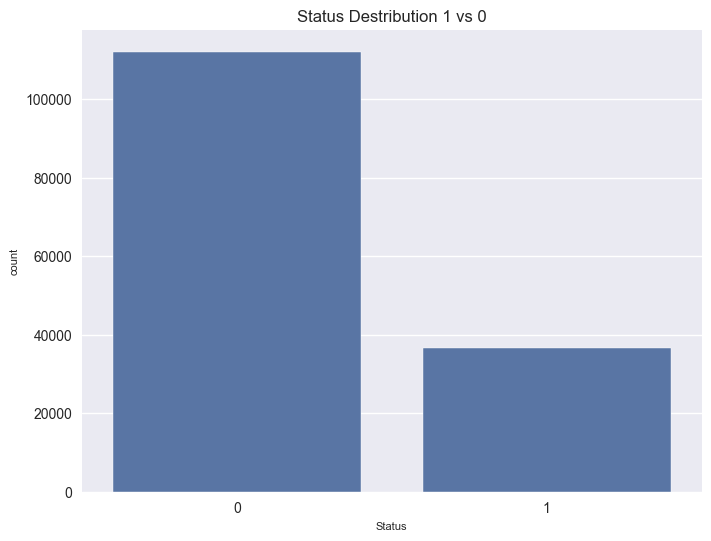

In [21]:
plt.figure(figsize = (8 , 6))

sns.countplot(x = cln_loan_data["Status"])

plt.title("Status Destribution 1 vs 0")
plt.show()

- countplot clearly shows the count of two classes (0 , 1).
- it suggest target feature is imbalenced , it means 0(replay) has high number of records ~102000 comparate to 1(default) records ~40000

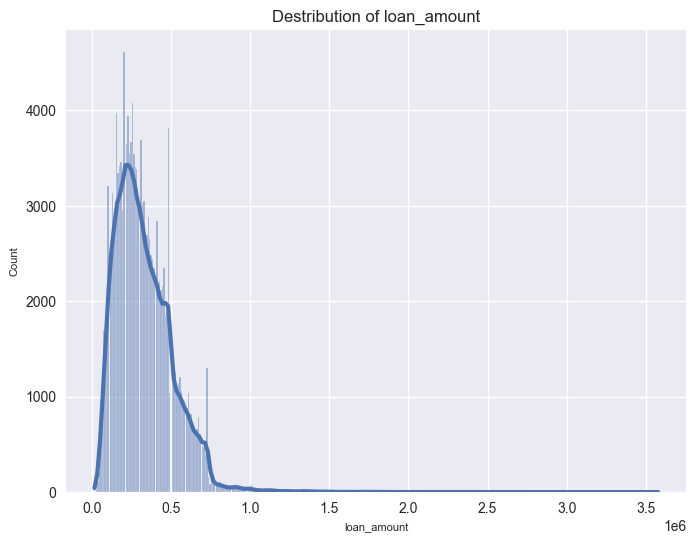

In [22]:
plt.figure(figsize = (8 , 6))

sns.histplot( x = cln_loan_data["loan_amount"] , kde = True)

plt.title("Destribution of loan_amount")
plt.show()

- Here we see , most of the data concentration is around the central typical value (median ~ 196500.0000)
- and it is right skewed due extreame values it means higher loan amount values are low and rare.
- feature have low variance in extreamly lower loan amount values , and high variance in extreamly higher loan amount values.
- hence, it is important for future analysis

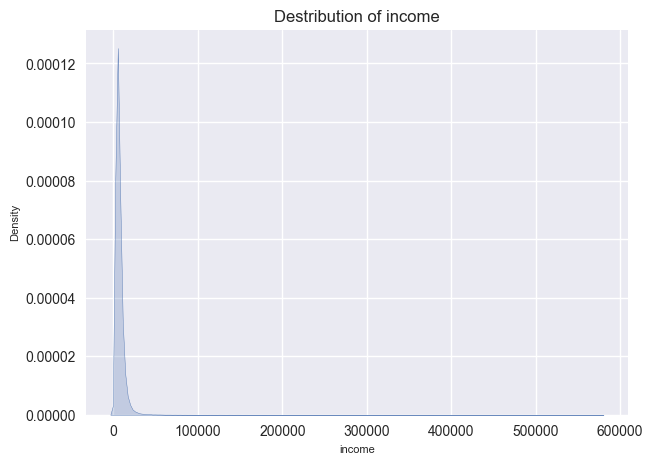

In [23]:
plt.figure(figsize = (7 , 5))

sns.kdeplot( x = cln_loan_data["income"] , fill = True)

plt.title("Destribution of income")
plt.show()

- Here in kde plot , income fetuare does not kept that much of information.
- it contains data is strongly concentrated in small range ~ -1880.3539 to 70,000 income.
- it is clearly right skewed , it contains outliears
- hence , typical value for income feture is median that is ~5700.0000

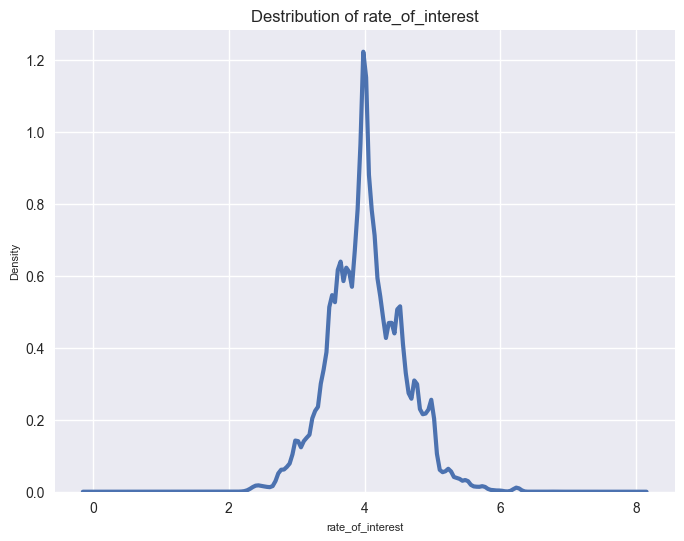

In [24]:
plt.figure(figsize = (8 , 6))

sns.kdeplot( x = cln_loan_data["rate_of_interest"])

plt.title("Destribution of rate_of_interest")
plt.show()

- in dataset , rate_of_interest values mostly in the range of 3 - 5 , and at 4 is most of the data is kept.
- dencity is varing to value to value
- it have high spread , it contains ouliears
- it is use full for future analysisi
- below rugplot demonstrate more clearlt about rate_of_interest

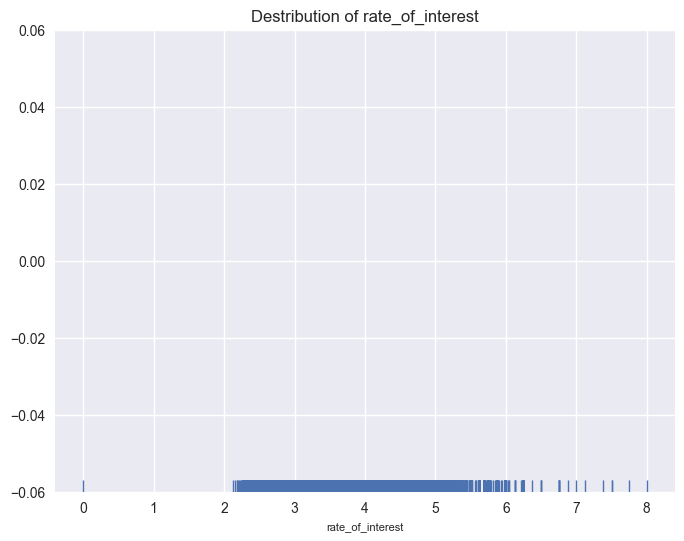

In [25]:
plt.figure(figsize = (8 , 6))

sns.rugplot( x = cln_loan_data["rate_of_interest"])

plt.title("Destribution of rate_of_interest")
plt.show()

In [26]:
cln_loan_data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,DTI
count,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000
mean,99224.5000,2019.0000,331117.7440,4.0263,0.4384,3240.7698,335.1157,491787.8009,6894.1647,699.7891,73.2004,0.2464,37.9963
std,42917.4766,0.0000,183909.3101,0.5456,0.5083,3058.2210,58.4253,354368.8991,6325.7665,115.8759,39.4370,0.4309,10.4101
min,24890.0000,2019.0000,16500.0000,0.0000,-3.6380,-3211.2754,96.0000,-40673.4272,-1880.3539,500.0000,-43.0975,0.0000,1.4275
25%,62057.2500,2019.0000,196500.0000,3.6250,0.0890,980.5798,360.0000,268000.0000,3780.0000,599.0000,63.1369,0.0000,31.0970
50%,99224.5000,2019.0000,296500.0000,3.9900,0.3877,2750.0000,360.0000,418000.0000,5700.0000,699.0000,75.1359,0.0000,39.0000
75%,136391.7500,2019.0000,436500.0000,4.3750,0.7712,4616.0203,360.0000,618000.0000,8400.0000,800.0000,85.2564,0.0000,45.0000
max,173559.0000,2019.0000,3576500.0000,8.0000,3.3570,60000.0000,360.0000,16508000.0000,578580.0000,900.0000,7831.2500,1.0000,61.0000


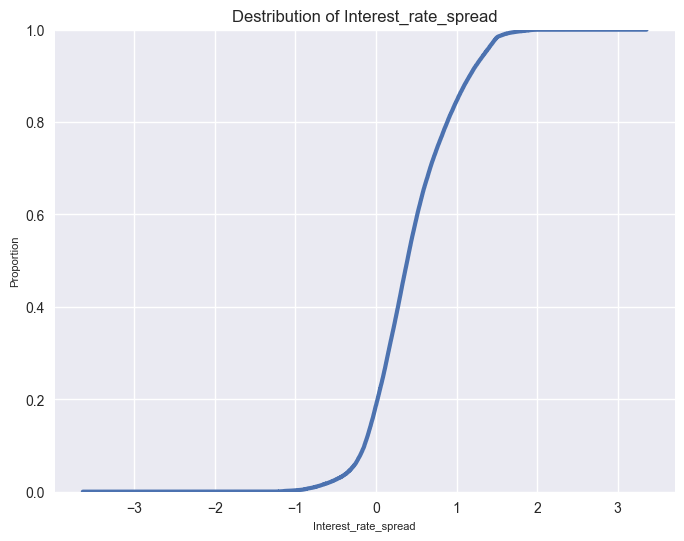

In [27]:
plt.figure(figsize = (8 , 6))

sns.ecdfplot( x = cln_loan_data["Interest_rate_spread"])

plt.title("Destribution of Interest_rate_spread")
plt.show()

- ecdf plot clearly show , Interest_rate_spread is left skewed
- most of the data concentration as ~0.5 to ~1.5 of 82% data is lies
- it is undet the typical value that is median 0.3877
- However , it have outliers (extreamly lower values)

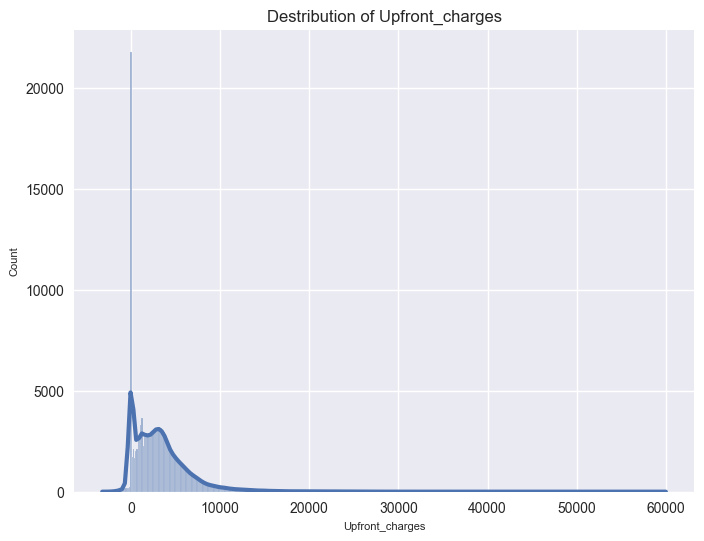

In [28]:
plt.figure(figsize = (8 , 6))

sns.histplot( x = cln_loan_data["Upfront_charges"] , kde = True)

plt.title("Destribution of Upfront_charges")
plt.show()

- Upfront_charges is highly tailed becouse of extreamly higher values (Outliers)
- However , high of the data is in range of 0 to 10,000 upfront charges
- it is right skewed , higher values are have high variability that leads to high spread.

In [29]:
cln_loan_data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,DTI
count,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000,148670.0000
mean,99224.5000,2019.0000,331117.7440,4.0263,0.4384,3240.7698,335.1157,491787.8009,6894.1647,699.7891,73.2004,0.2464,37.9963
std,42917.4766,0.0000,183909.3101,0.5456,0.5083,3058.2210,58.4253,354368.8991,6325.7665,115.8759,39.4370,0.4309,10.4101
min,24890.0000,2019.0000,16500.0000,0.0000,-3.6380,-3211.2754,96.0000,-40673.4272,-1880.3539,500.0000,-43.0975,0.0000,1.4275
25%,62057.2500,2019.0000,196500.0000,3.6250,0.0890,980.5798,360.0000,268000.0000,3780.0000,599.0000,63.1369,0.0000,31.0970
50%,99224.5000,2019.0000,296500.0000,3.9900,0.3877,2750.0000,360.0000,418000.0000,5700.0000,699.0000,75.1359,0.0000,39.0000
75%,136391.7500,2019.0000,436500.0000,4.3750,0.7712,4616.0203,360.0000,618000.0000,8400.0000,800.0000,85.2564,0.0000,45.0000
max,173559.0000,2019.0000,3576500.0000,8.0000,3.3570,60000.0000,360.0000,16508000.0000,578580.0000,900.0000,7831.2500,1.0000,61.0000


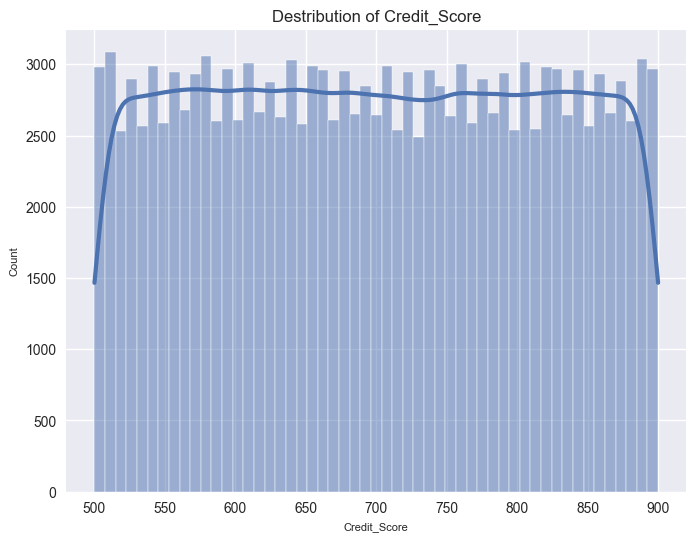

In [30]:
plt.figure(figsize = (8 , 6))

sns.histplot( x = cln_loan_data["Credit_Score"] , kde = True)

plt.title("Destribution of Credit_Score")
plt.show()

- credit_score is not high have variation in its values
- values are almost consistent in nature and high concentraction of data
- values are varing by ~115.8759 from the typical centar value
- credit_score is important feature for future analysis

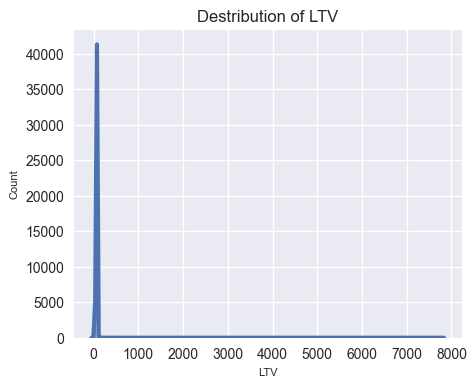

In [31]:
plt.figure(figsize = (5 , 4))

sns.histplot(x = cln_loan_data["LTV"] , kde = True)

plt.title("Destribution of LTV")
plt.show()

- LTV ration is right skewed
- high concentration of the data values are extreamly lower values
- it range of -43.0975 to 300 LTV
- values are varing by ~39.4370 from its centore
- it is important feature for future analysis
- it contains outliers

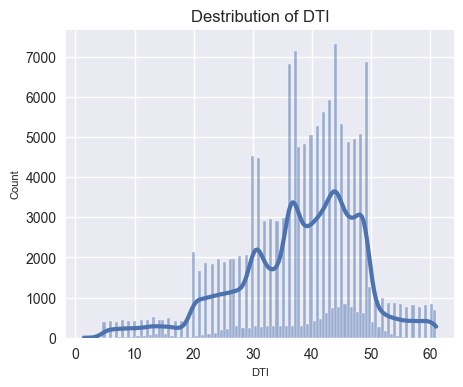

In [32]:
plt.figure(figsize = (5 , 4))

sns.histplot(x = cln_loan_data["DTI"] , kde = True)

plt.title("Destribution of DTI")
plt.show()

- LTV ration is left skewed
- high concentration of the data values are extreamly lower values
- it range of 30 to 50 DTI
- values are varing by ~10.4101 from its centore
- it is important feature for future analysis
- it contains outliers

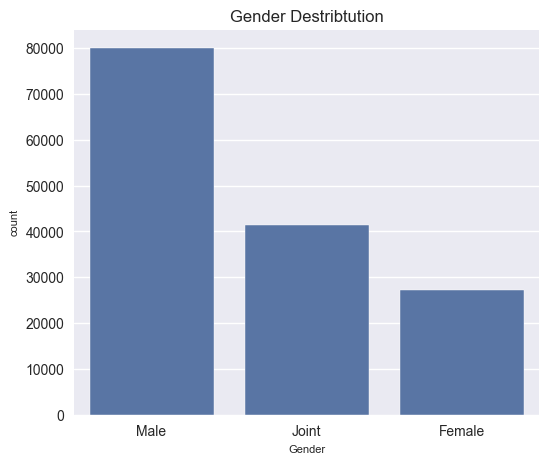

In [33]:
plt.figure(figsize = (6 , 5))

sns.countplot(x = cln_loan_data["Gender"])

plt.title("Gender Destribtution")
plt.show()

- Gender is one of the demographic feature of barrower
- in dataset Male records upto ~80,000 (High) and Joint (co applicants both male and female) are ~40100 and females are ~20800 records respectivily.

#### Check loan related Categorical features destribution

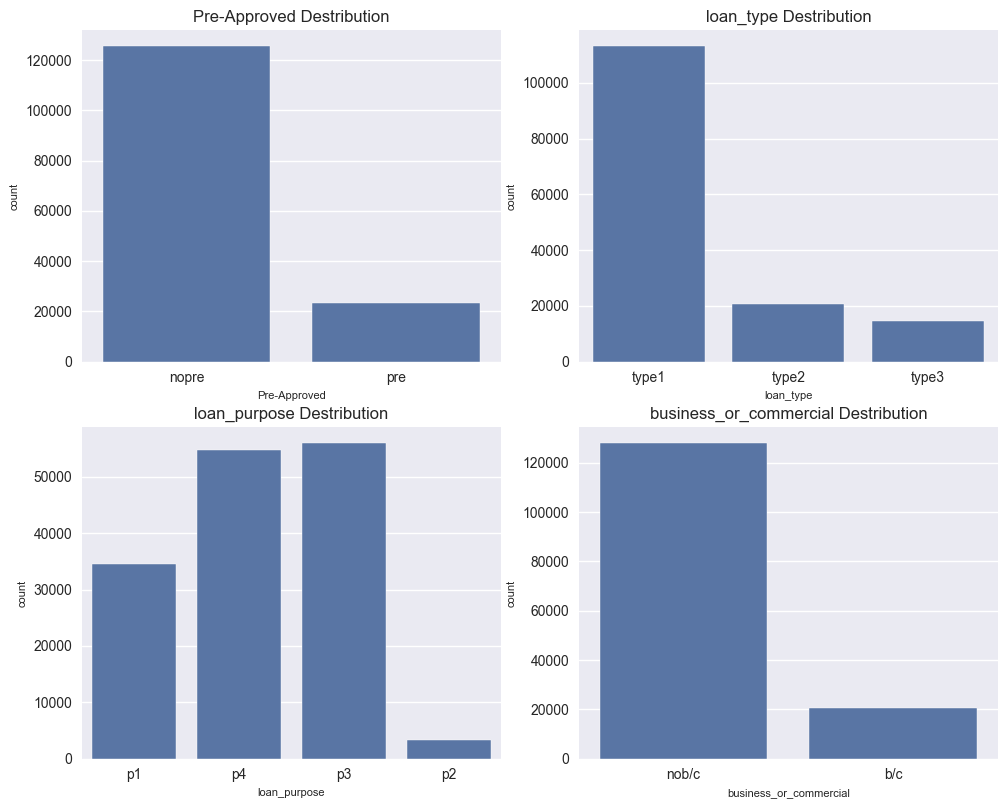

In [34]:
cols = ["Pre-Approved" , "loan_type" , "loan_purpose" , "business_or_commercial"]

fig , axes = plt.subplots(2 , 2 , figsize = (10  , 8))
axes = axes.flatten()

for i , col in enumerate(cols):
    sns.countplot(x = cln_loan_data[col] , ax = axes[i])
    axes[i].set_title(f"{col} Destribution")
plt.tight_layout()
plt.show()

- thise loan factore are important becouse their contains loat of information with their individual groups , this are useful for future analysis of default prediction

#### Check credit profile related Categorical features destribution

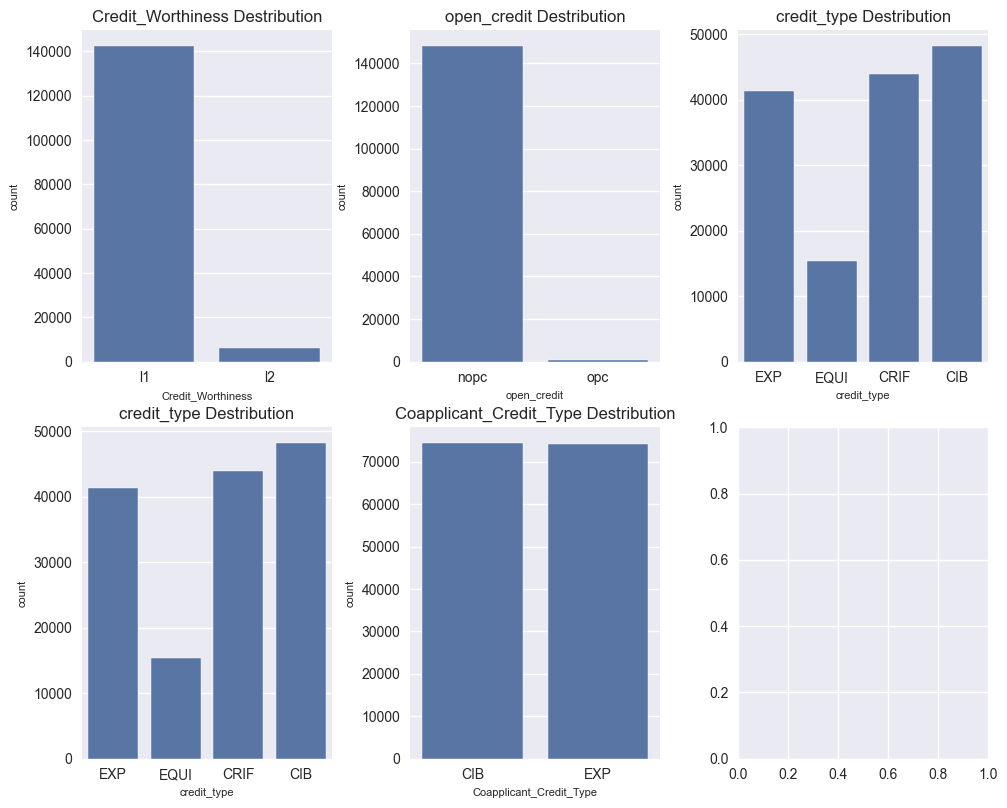

In [35]:
cols = ["Credit_Worthiness" , "open_credit" , "credit_type" , "credit_type", "Coapplicant_Credit_Type"]

fig , axes = plt.subplots(2 , 3 , figsize = (10  , 8))
axes = axes.flatten()

for i , col in enumerate(cols):
    sns.countplot(x = cln_loan_data[col] , ax = axes[i])
    axes[i].set_title(f"{col} Destribution")
plt.tight_layout()
plt.show()

#### Check payment structure related Categorical features destribution

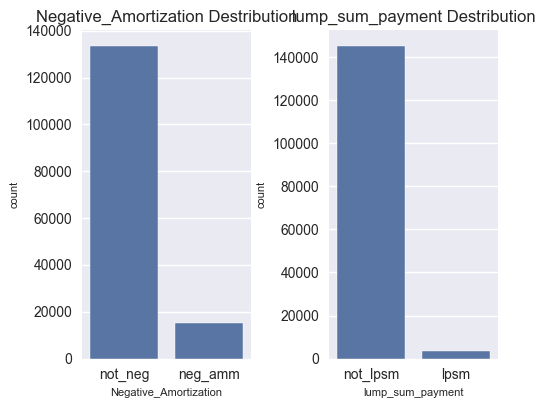

In [36]:
cols = ["Negative_Amortization" , "lump_sum_payment"]

fig , axes = plt.subplots(1 , 2 , figsize = (5  ,4))
axes = axes.flatten()

for i , col in enumerate(cols):
    sns.countplot(x = cln_loan_data[col] , ax = axes[i])
    axes[i].set_title(f"{col} Destribution")
plt.tight_layout()
plt.show()

#### Check property related Categorical features destribution

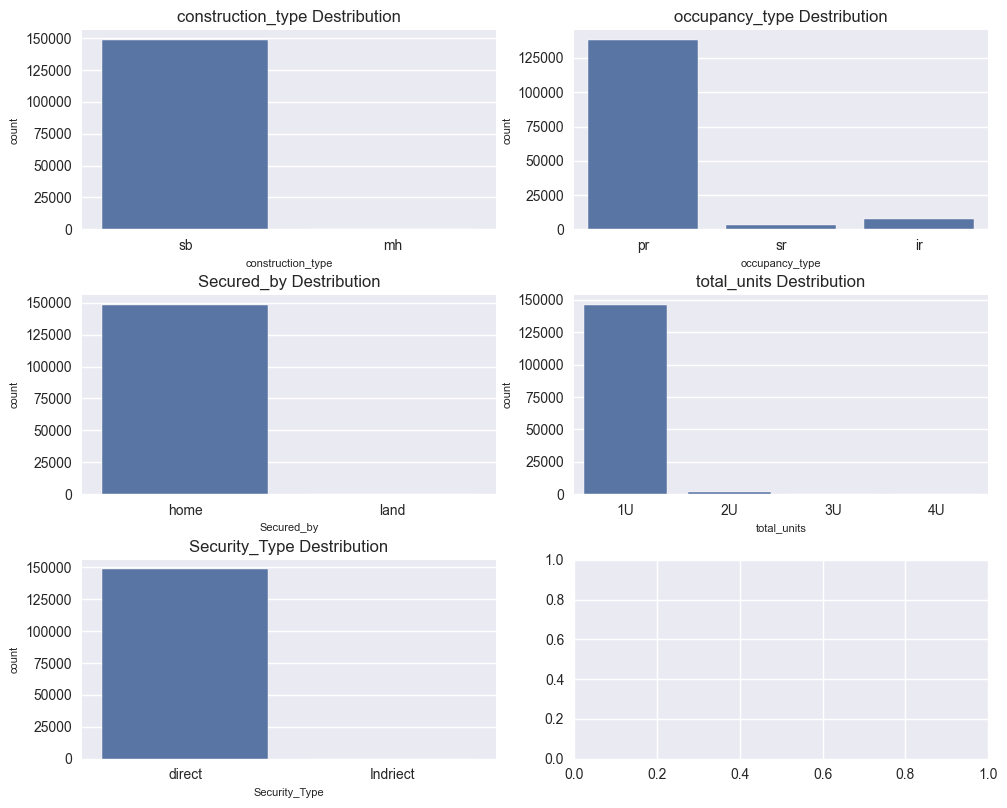

In [37]:
cols = ["construction_type" , "occupancy_type" , "Secured_by" , "total_units" , "Security_Type"]

fig , axes = plt.subplots(3 , 2 , figsize = (10  , 8))
axes = axes.flatten()

for i , col in enumerate(cols):
    sns.countplot(x = cln_loan_data[col] , ax = axes[i])
    axes[i].set_title(f"{col} Destribution")
plt.tight_layout()
plt.show()

### Outlier detection and treatment

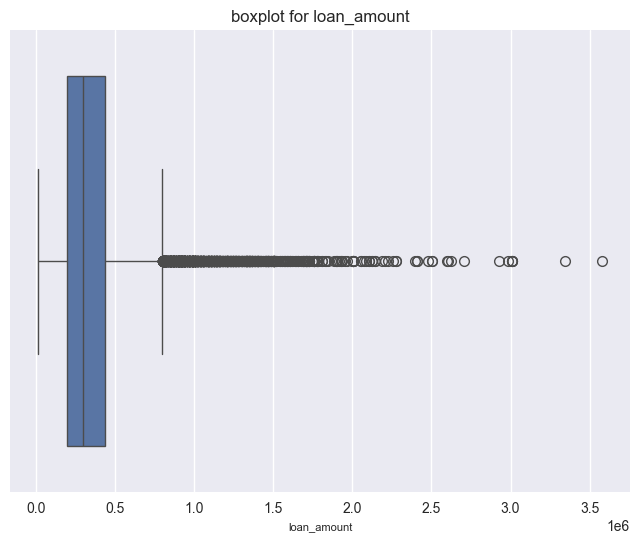

In [38]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = cln_loan_data["loan_amount"])

plt.title("boxplot for loan_amount")
plt.show()

In [39]:
loan_amount_median = cln_loan_data["loan_amount"].median()

Median_Absolute_Deviation = np.median(np.abs(cln_loan_data["loan_amount"] - loan_amount_median))

modified_z_scores = 0.6745 * (cln_loan_data["loan_amount"] - loan_amount_median) / Median_Absolute_Deviation

threshold = 2.6

outliers = cln_loan_data[np.abs(modified_z_scores) > threshold]

In [40]:
outliers.shape

(2277, 34)

In [41]:
clean_loan_data = cln_loan_data[np.abs(modified_z_scores) <= threshold]

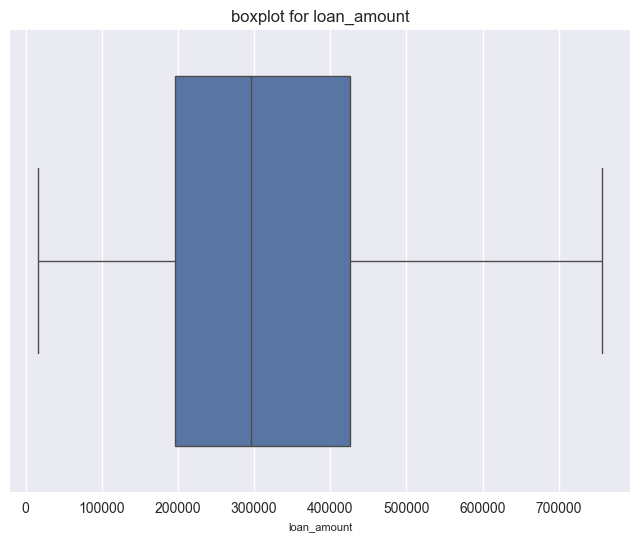

In [42]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = clean_loan_data["loan_amount"])

plt.title("boxplot for loan_amount")
plt.show()

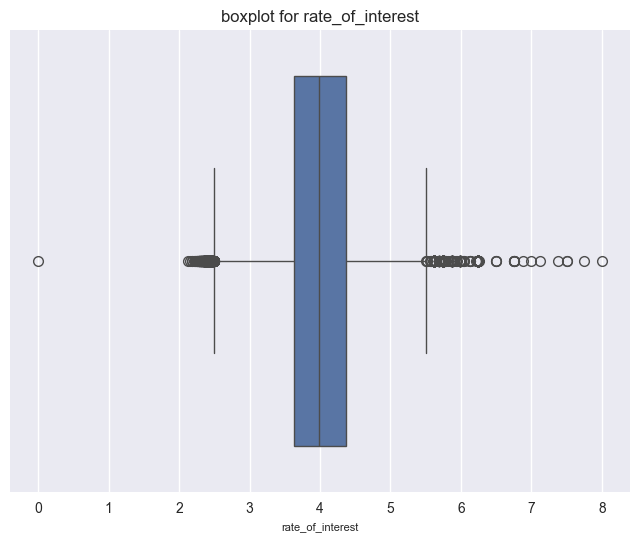

In [43]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = clean_loan_data["rate_of_interest"])

plt.title("boxplot for rate_of_interest")
plt.show()

In [44]:
rate_of_interest_median = clean_loan_data["rate_of_interest"].median()

Median_Absolute_Deviation = np.median(np.abs(clean_loan_data["rate_of_interest"] - rate_of_interest_median))

modified_z_scores = 0.6745 * (clean_loan_data["rate_of_interest"] - rate_of_interest_median) / Median_Absolute_Deviation

threshold = 2.8

outliers = clean_loan_data[np.abs(modified_z_scores) > threshold]

In [45]:
outliers.shape

(1296, 34)

In [46]:
clean_loan_data = clean_loan_data[np.abs(modified_z_scores) <= threshold]

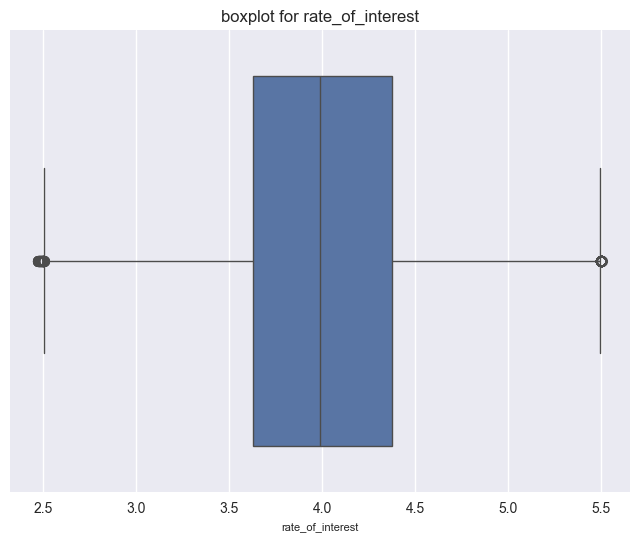

In [47]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = clean_loan_data["rate_of_interest"])

plt.title("boxplot for rate_of_interest")
plt.show()

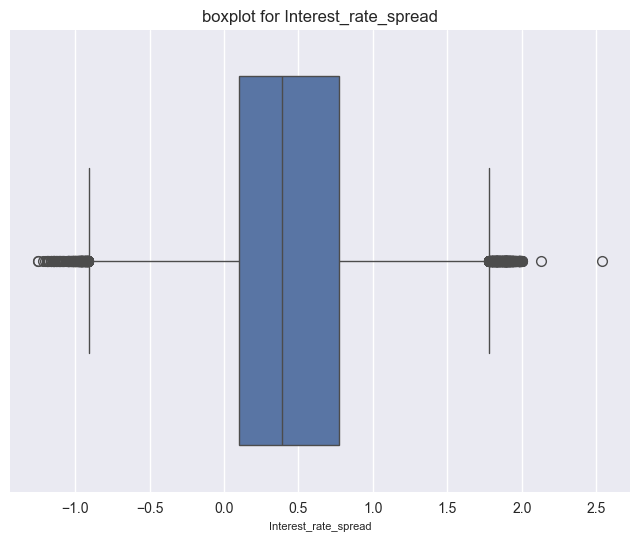

In [48]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = clean_loan_data["Interest_rate_spread"])

plt.title("boxplot for Interest_rate_spread")
plt.show()

In [49]:
Interest_rate_spread_median = clean_loan_data["Interest_rate_spread"].median()

Median_Absolute_Deviation = np.median(np.abs(clean_loan_data["Interest_rate_spread"] - Interest_rate_spread_median))

modified_z_scores = 0.6745 * (clean_loan_data["Interest_rate_spread"] - Interest_rate_spread_median) / Median_Absolute_Deviation

threshold = 2.6

outliers = clean_loan_data[np.abs(modified_z_scores) > threshold]

In [50]:
outliers.shape

(1435, 34)

In [51]:
clean_loan_data = clean_loan_data[np.abs(modified_z_scores) <= threshold]

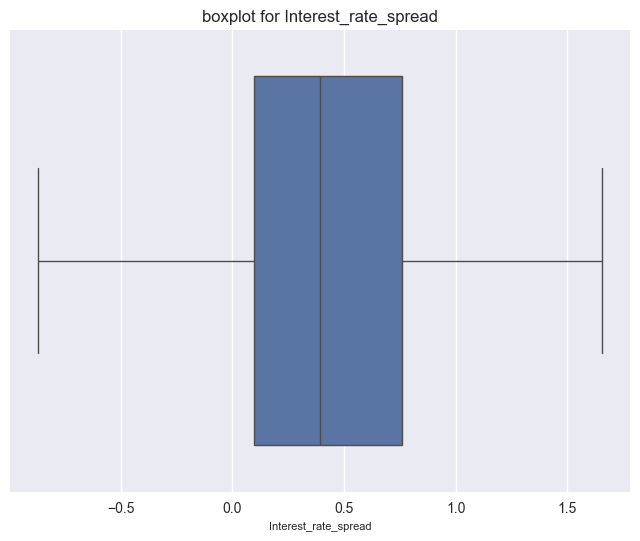

In [52]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = clean_loan_data["Interest_rate_spread"])

plt.title("boxplot for Interest_rate_spread")
plt.show()

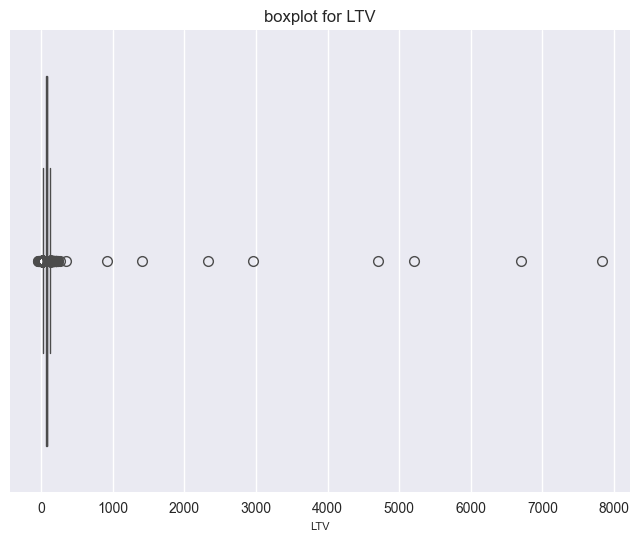

In [53]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = clean_loan_data["LTV"])

plt.title("boxplot for LTV")
plt.show()

In [54]:
LTV_median = clean_loan_data["LTV"].median()

Median_Absolute_Deviation = np.median(np.abs(clean_loan_data["LTV"] - LTV_median))

modified_z_scores = 0.6745 * (clean_loan_data["LTV"] - LTV_median) / Median_Absolute_Deviation

threshold = 2.4

outliers = clean_loan_data[np.abs(modified_z_scores) > threshold]

In [55]:
outliers.shape

(6679, 34)

In [56]:
clean_loan_data = clean_loan_data[np.abs(modified_z_scores) <= threshold]

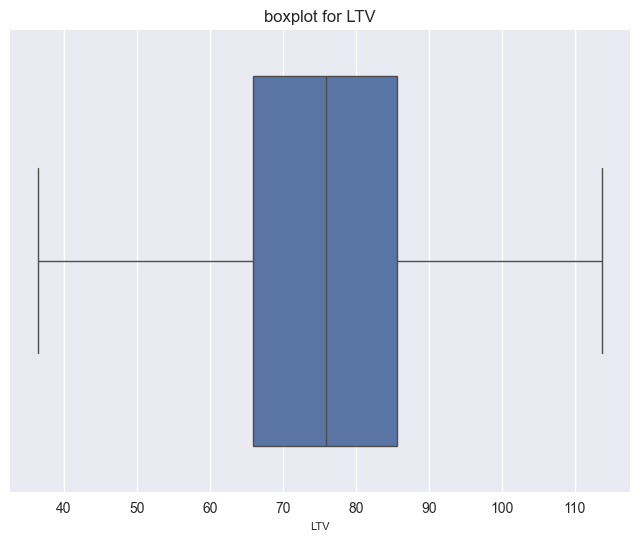

In [57]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = clean_loan_data["LTV"])

plt.title("boxplot for LTV")
plt.show()

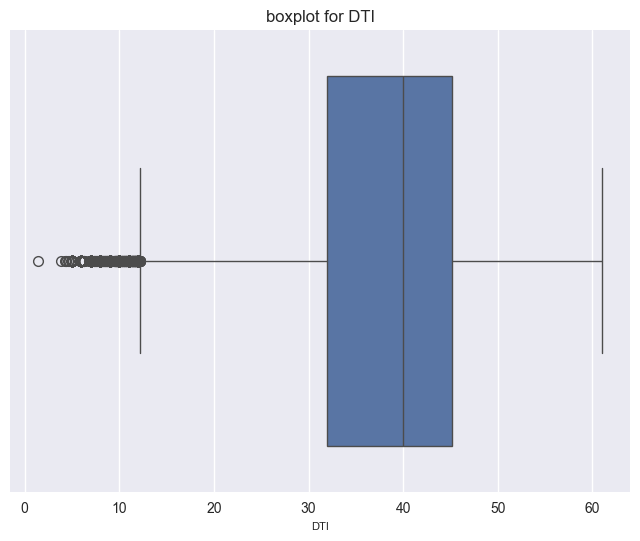

In [58]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = clean_loan_data["DTI"])

plt.title("boxplot for DTI")
plt.show()

In [59]:
DTI_median = clean_loan_data["DTI"].median()

Median_Absolute_Deviation = np.median(np.abs(clean_loan_data["DTI"] - DTI_median))

modified_z_scores = 0.6745 * (clean_loan_data["DTI"] - DTI_median) / Median_Absolute_Deviation

threshold = 2.9

outliers = clean_loan_data[np.abs(modified_z_scores) > threshold]

In [60]:
outliers.shape

(3844, 34)

In [61]:
clean_loan_data = clean_loan_data[np.abs(modified_z_scores) <= threshold]

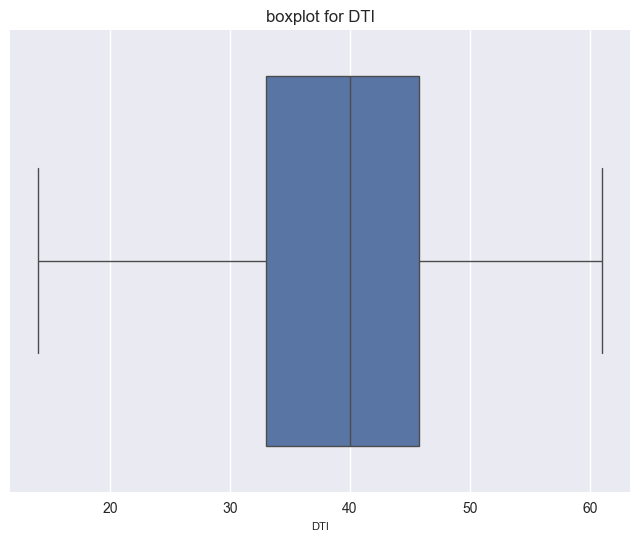

In [62]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = clean_loan_data["DTI"])

plt.title("boxplot for DTI")
plt.show()

In [63]:
clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133139 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         133139 non-null  int64  
 1   year                       133139 non-null  int64  
 2   loan_limit                 133139 non-null  object 
 3   Gender                     133139 non-null  object 
 4   Pre-Approved               133139 non-null  object 
 5   loan_type                  133139 non-null  object 
 6   loan_purpose               133139 non-null  object 
 7   Credit_Worthiness          133139 non-null  object 
 8   open_credit                133139 non-null  object 
 9   business_or_commercial     133139 non-null  object 
 10  loan_amount                133139 non-null  int64  
 11  rate_of_interest           133139 non-null  float64
 12  Interest_rate_spread       133139 non-null  float64
 13  Upfront_charges            133139 

### Bivariate & Multivariate Analysis (Relationships)

In [64]:
num_cols = clean_loan_data.select_dtypes(include = np.number).columns

In [65]:
num_cols

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'DTI'],
      dtype='object')

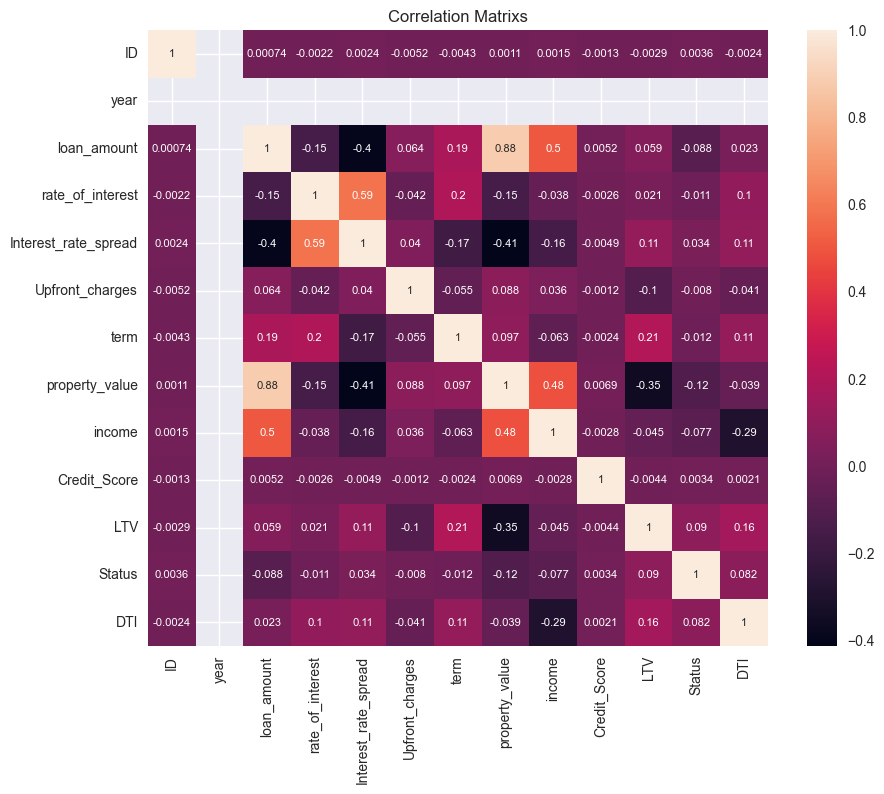

In [66]:
corr_matrix = clean_loan_data[num_cols].corr()

plt.figure(figsize = (10 , 8))

sns.heatmap(corr_matrix , annot = True , annot_kws = {"size" : 8})

plt.title("Correlation Matrixs")
plt.show()

In [67]:
clean_loan_data[num_cols].corr()["Status"].sort_values(ascending = False)

Status                  1.0000
LTV                     0.0898
DTI                     0.0820
Interest_rate_spread    0.0339
ID                      0.0036
Credit_Score            0.0034
Upfront_charges        -0.0080
rate_of_interest       -0.0107
term                   -0.0124
income                 -0.0767
loan_amount            -0.0884
property_value         -0.1171
year                       NaN
Name: Status, dtype: float64

In [68]:
clean_loan_data["Status"].replace(
    {
        0 : "No",
        1 : "default"
    },inplace = True
)

In [69]:
clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133139 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         133139 non-null  int64  
 1   year                       133139 non-null  int64  
 2   loan_limit                 133139 non-null  object 
 3   Gender                     133139 non-null  object 
 4   Pre-Approved               133139 non-null  object 
 5   loan_type                  133139 non-null  object 
 6   loan_purpose               133139 non-null  object 
 7   Credit_Worthiness          133139 non-null  object 
 8   open_credit                133139 non-null  object 
 9   business_or_commercial     133139 non-null  object 
 10  loan_amount                133139 non-null  int64  
 11  rate_of_interest           133139 non-null  float64
 12  Interest_rate_spread       133139 non-null  float64
 13  Upfront_charges            133139 

In [70]:
def chie2_test(group1 , group2):
    cross = pd.crosstab(group1 , group2)
    stat , p , df , evidence = chi2_contingency(cross)

    n = cross.to_numpy().sum()
    cramers_v = np.sqrt(stat / (n * (min(cross.shape) - 1)))
    result = {
        "statistic" : stat,
        "P value" : p,
        "df" : df,
        "cramers_v" : cramers_v
    }
    segnificance_level = 0.05

    if p < segnificance_level:
        print("Reject Null Hypotheses , there is significant difference between two groups")
    else:
        print("Accept Null Hypotheses , there is no significant difference bewtween two groups")
    plt.figure(figsize = (5 , 3))
    sns.heatmap(cross , annot = True , annot_kws = {"size" : 10})
    plt.title("Contigency Table")
    plt.show()
    
    return result

Reject Null Hypotheses , there is significant difference between two groups


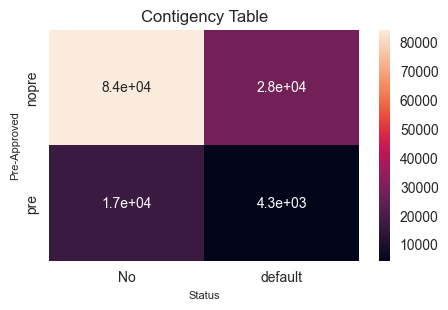

{'statistic': np.float64(185.76248982937886),
 'P value': np.float64(2.675110141393654e-42),
 'df': 1,
 'cramers_v': np.float64(0.03735307556119539)}

In [71]:
chie2_test(clean_loan_data["Pre-Approved"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


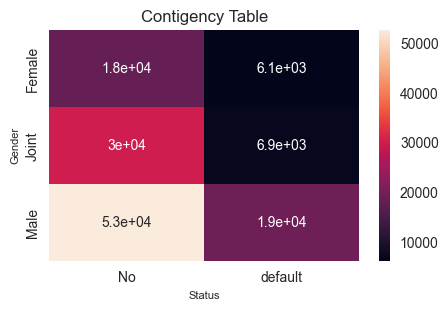

{'statistic': np.float64(844.3446802220494),
 'P value': np.float64(4.496579514593474e-184),
 'df': 2,
 'cramers_v': np.float64(0.0796355970432606)}

In [72]:
chie2_test(clean_loan_data["Gender"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


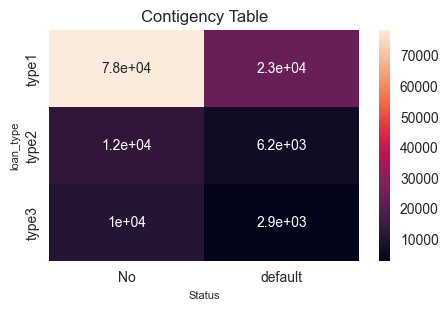

{'statistic': np.float64(980.3516969743885),
 'P value': np.float64(1.3162362269261413e-213),
 'df': 2,
 'cramers_v': np.float64(0.08581008005384935)}

In [73]:
chie2_test(clean_loan_data["loan_type"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


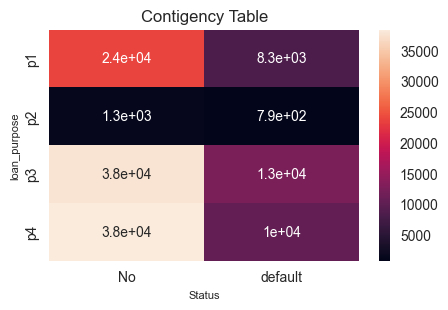

{'statistic': np.float64(478.07289322470683),
 'P value': np.float64(2.6939093524131746e-103),
 'df': 3,
 'cramers_v': np.float64(0.05992311959015748)}

In [74]:
chie2_test(clean_loan_data["loan_purpose"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


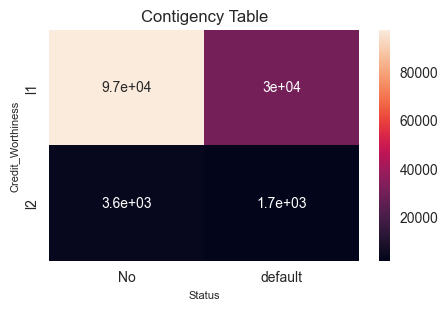

{'statistic': np.float64(216.57478127411986),
 'P value': np.float64(5.052859897495912e-49),
 'df': 1,
 'cramers_v': np.float64(0.040332142866501726)}

In [75]:
chie2_test(clean_loan_data["Credit_Worthiness"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


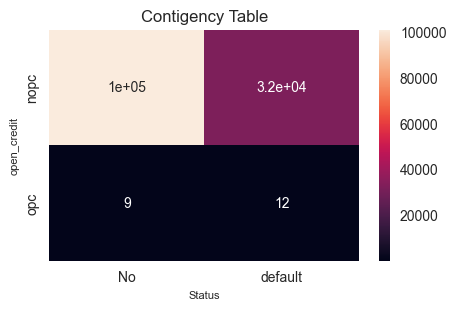

{'statistic': np.float64(10.74478868273896),
 'P value': np.float64(0.001045733812260465),
 'df': 1,
 'cramers_v': np.float64(0.008983514931855233)}

In [76]:
chie2_test(clean_loan_data["open_credit"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


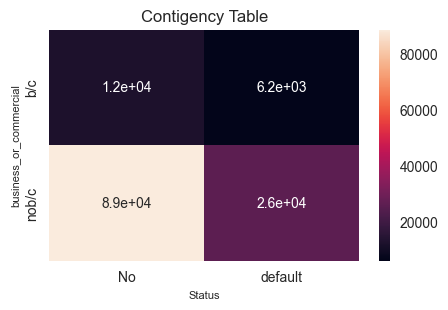

{'statistic': np.float64(972.4188993450555),
 'P value': np.float64(1.7761795024560487e-213),
 'df': 1,
 'cramers_v': np.float64(0.08546219640672585)}

In [77]:
chie2_test(clean_loan_data["business_or_commercial"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


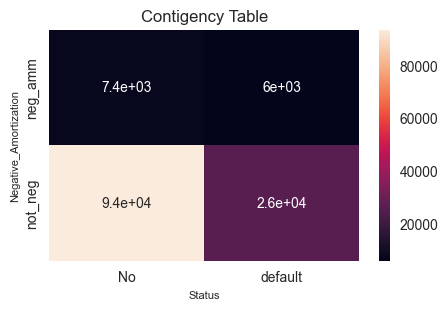

{'statistic': np.float64(3453.402005283759),
 'P value': np.float64(0.0),
 'df': 1,
 'cramers_v': np.float64(0.16105378027613645)}

In [78]:
chie2_test(clean_loan_data["Negative_Amortization"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


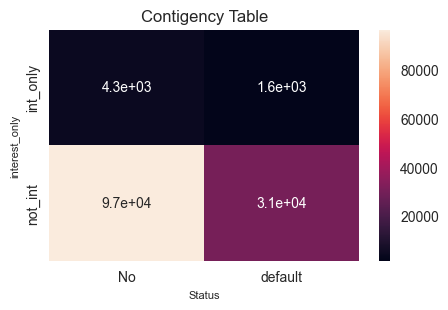

{'statistic': np.float64(38.03964239945028),
 'P value': np.float64(6.932173489570745e-10),
 'df': 1,
 'cramers_v': np.float64(0.016903069123101636)}

In [79]:
chie2_test(clean_loan_data["interest_only"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


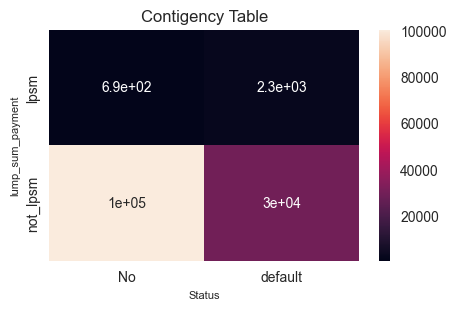

{'statistic': np.float64(4656.2879625578635),
 'P value': np.float64(0.0),
 'df': 1,
 'cramers_v': np.float64(0.1870110506377092)}

In [80]:
chie2_test(clean_loan_data["lump_sum_payment"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


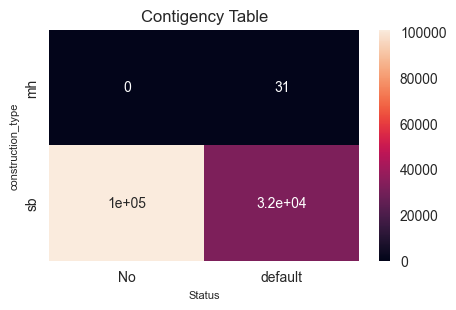

{'statistic': np.float64(93.28961432514556),
 'P value': np.float64(4.517564225141193e-22),
 'df': 1,
 'cramers_v': np.float64(0.02647061329139324)}

In [81]:
chie2_test(clean_loan_data["construction_type"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


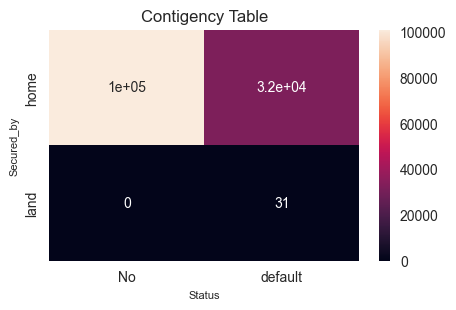

{'statistic': np.float64(93.28961432514556),
 'P value': np.float64(4.517564225141193e-22),
 'df': 1,
 'cramers_v': np.float64(0.02647061329139324)}

In [82]:
chie2_test(clean_loan_data["Secured_by"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


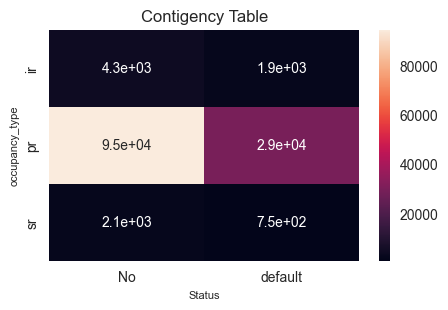

{'statistic': np.float64(190.17914963221784),
 'P value': np.float64(5.048035156424125e-42),
 'df': 2,
 'cramers_v': np.float64(0.037794517492413894)}

In [83]:
chie2_test(clean_loan_data["occupancy_type"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


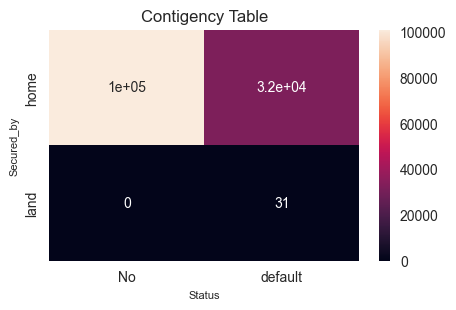

{'statistic': np.float64(93.28961432514556),
 'P value': np.float64(4.517564225141193e-22),
 'df': 1,
 'cramers_v': np.float64(0.02647061329139324)}

In [84]:
chie2_test(clean_loan_data["Secured_by"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


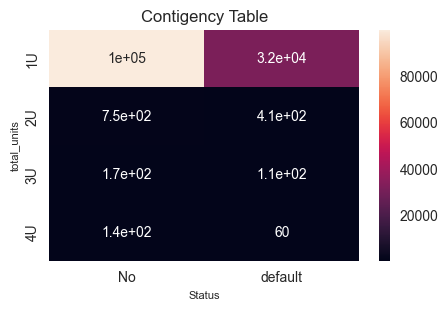

{'statistic': np.float64(124.06810339224413),
 'P value': np.float64(1.0260839012639067e-26),
 'df': 3,
 'cramers_v': np.float64(0.030526529027587204)}

In [85]:
chie2_test(clean_loan_data["total_units"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


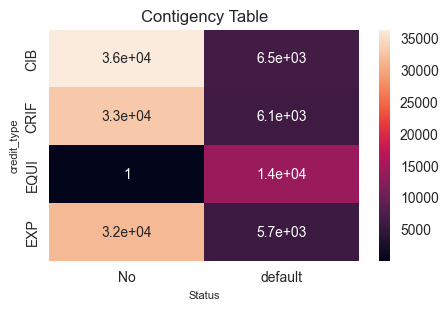

{'statistic': np.float64(48833.11032187543),
 'P value': np.float64(0.0),
 'df': 3,
 'cramers_v': np.float64(0.605626050884956)}

In [86]:
chie2_test(clean_loan_data["credit_type"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


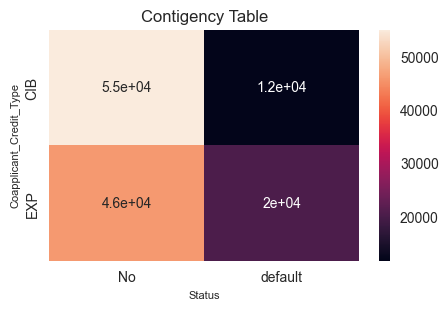

{'statistic': np.float64(3197.9374440100373),
 'P value': np.float64(0.0),
 'df': 1,
 'cramers_v': np.float64(0.15498238386544966)}

In [87]:
chie2_test(clean_loan_data["Coapplicant_Credit_Type"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


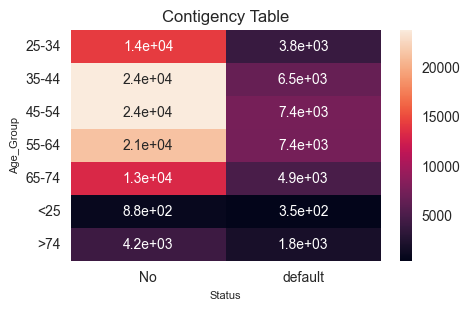

{'statistic': np.float64(462.8924585322963),
 'P value': np.float64(8.237640319884835e-97),
 'df': 6,
 'cramers_v': np.float64(0.058964063783666476)}

In [88]:
chie2_test(clean_loan_data["Age_Group"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


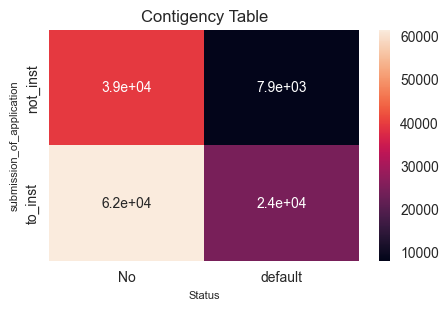

{'statistic': np.float64(2272.714048179505),
 'P value': np.float64(0.0),
 'df': 1,
 'cramers_v': np.float64(0.13065311029283933)}

In [89]:
chie2_test(clean_loan_data["submission_of_application"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


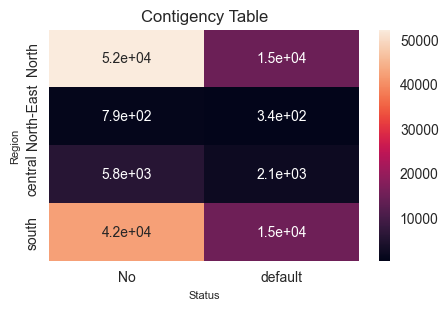

{'statistic': np.float64(361.44241288884683),
 'P value': np.float64(4.965162975917033e-78),
 'df': 3,
 'cramers_v': np.float64(0.05210350161990545)}

In [90]:
chie2_test(clean_loan_data["Region"] , clean_loan_data["Status"])

Reject Null Hypotheses , there is significant difference between two groups


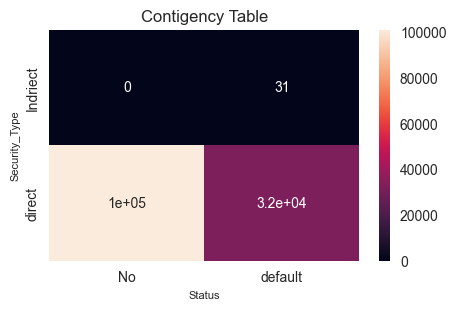

{'statistic': np.float64(93.28961432514556),
 'P value': np.float64(4.517564225141193e-22),
 'df': 1,
 'cramers_v': np.float64(0.02647061329139324)}

In [91]:
chie2_test(clean_loan_data["Security_Type"] , clean_loan_data["Status"])

In [92]:
cat_cols = clean_loan_data.select_dtypes(include = "object").columns
cat_cols

Index(['loan_limit', 'Gender', 'Pre-Approved', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Negative_Amortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'Coapplicant_Credit_Type', 'Age_Group',
       'submission_of_application', 'Region', 'Security_Type', 'Status'],
      dtype='object')

Negative_Amortization
lump_sum_payment
credit_type
Coapplicant_Credit_Type
submission_of_application

### Feature Engineering

In [93]:
clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133139 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         133139 non-null  int64  
 1   year                       133139 non-null  int64  
 2   loan_limit                 133139 non-null  object 
 3   Gender                     133139 non-null  object 
 4   Pre-Approved               133139 non-null  object 
 5   loan_type                  133139 non-null  object 
 6   loan_purpose               133139 non-null  object 
 7   Credit_Worthiness          133139 non-null  object 
 8   open_credit                133139 non-null  object 
 9   business_or_commercial     133139 non-null  object 
 10  loan_amount                133139 non-null  int64  
 11  rate_of_interest           133139 non-null  float64
 12  Interest_rate_spread       133139 non-null  float64
 13  Upfront_charges            133139 

In [94]:
clean_loan_data["LTC"] = clean_loan_data["loan_amount"] / (clean_loan_data["property_value"] + clean_loan_data["Upfront_charges"])

In [95]:
clean_loan_data["Interest Paid"] = clean_loan_data["rate_of_interest"] * clean_loan_data["loan_amount"]

In [96]:
clean_loan_data["Total payment"] = clean_loan_data["Interest Paid"] + clean_loan_data["Upfront_charges"]

In [97]:
clean_loan_data["ARP"] = (clean_loan_data["Total payment"] / clean_loan_data["loan_amount"]) * 100

In [98]:
clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133139 entries, 0 to 148669
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         133139 non-null  int64  
 1   year                       133139 non-null  int64  
 2   loan_limit                 133139 non-null  object 
 3   Gender                     133139 non-null  object 
 4   Pre-Approved               133139 non-null  object 
 5   loan_type                  133139 non-null  object 
 6   loan_purpose               133139 non-null  object 
 7   Credit_Worthiness          133139 non-null  object 
 8   open_credit                133139 non-null  object 
 9   business_or_commercial     133139 non-null  object 
 10  loan_amount                133139 non-null  int64  
 11  rate_of_interest           133139 non-null  float64
 12  Interest_rate_spread       133139 non-null  float64
 13  Upfront_charges            133139 

In [99]:
clean_loan_data["Age_Group"].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25'],
      dtype=object)

In [100]:
age_group_names = {
    "<25": "Youth",
    "25-34": "Young Adults",
    "35-44": "Early Middle-Aged",
    "45-54": "Late Middle-Aged",
    "55-64": "Pre-Retirement",
    "65-74": "Early Seniors",
    ">74": "Elderly"
}
clean_loan_data["Age_Group"].replace(age_group_names , inplace = True)

Reject Null Hypotheses , there is significant difference between two groups


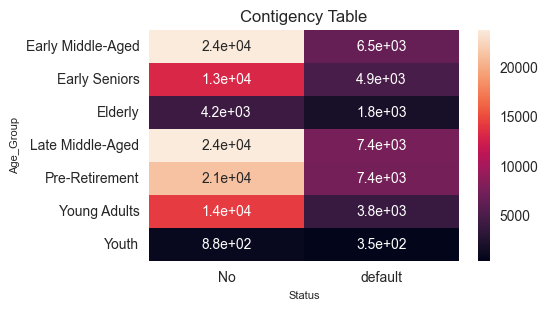

{'statistic': np.float64(462.8924585322962),
 'P value': np.float64(8.237640319885305e-97),
 'df': 6,
 'cramers_v': np.float64(0.05896406378366647)}

In [101]:
chie2_test(clean_loan_data["Age_Group"] , clean_loan_data["Status"])

In [102]:
clean_loan_data["Status"].replace(
    {
        "No" : 0,
        "default" : 1
    },inplace = True
)

In [103]:
num_cols = clean_loan_data.select_dtypes(include = np.number).columns

In [104]:
clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133139 entries, 0 to 148669
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         133139 non-null  int64  
 1   year                       133139 non-null  int64  
 2   loan_limit                 133139 non-null  object 
 3   Gender                     133139 non-null  object 
 4   Pre-Approved               133139 non-null  object 
 5   loan_type                  133139 non-null  object 
 6   loan_purpose               133139 non-null  object 
 7   Credit_Worthiness          133139 non-null  object 
 8   open_credit                133139 non-null  object 
 9   business_or_commercial     133139 non-null  object 
 10  loan_amount                133139 non-null  int64  
 11  rate_of_interest           133139 non-null  float64
 12  Interest_rate_spread       133139 non-null  float64
 13  Upfront_charges            133139 

In [105]:
clean_loan_data[num_cols].corr()["Status"].sort_values(ascending = False)

Status                  1.0000
LTV                     0.0898
LTC                     0.0834
DTI                     0.0820
Interest_rate_spread    0.0339
ID                      0.0036
Credit_Score            0.0034
Upfront_charges        -0.0080
ARP                    -0.0100
rate_of_interest       -0.0107
term                   -0.0124
income                 -0.0767
loan_amount            -0.0884
Interest Paid          -0.0925
Total payment          -0.0925
property_value         -0.1171
year                       NaN
Name: Status, dtype: float64

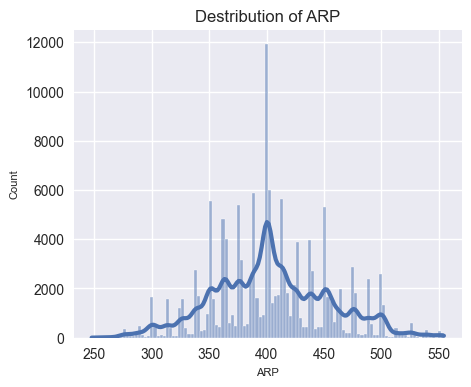

In [106]:
plt.figure(figsize = (5 , 4))

sns.histplot(x = clean_loan_data["ARP"] , kde = True)

plt.title("Destribution of ARP")
plt.show()

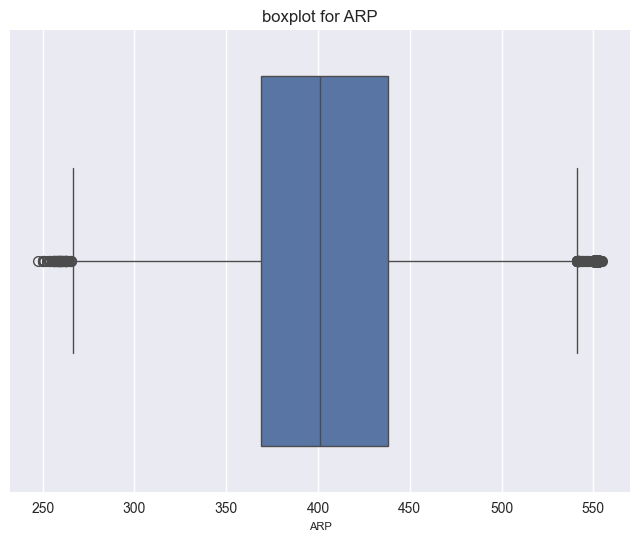

In [107]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = clean_loan_data["ARP"])

plt.title("boxplot for ARP")
plt.show()

In [108]:
ARP_median = clean_loan_data["ARP"].median()

Median_Absolute_Deviation = np.median(np.abs(clean_loan_data["ARP"] - ARP_median))

modified_z_scores = 0.6745 * (clean_loan_data["ARP"] - ARP_median) / Median_Absolute_Deviation

threshold = 2.5

outliers = clean_loan_data[np.abs(modified_z_scores) > threshold]

In [109]:
clean_loan_data = clean_loan_data[np.abs(modified_z_scores) <= threshold]

In [110]:
outliers.shape

(1091, 38)

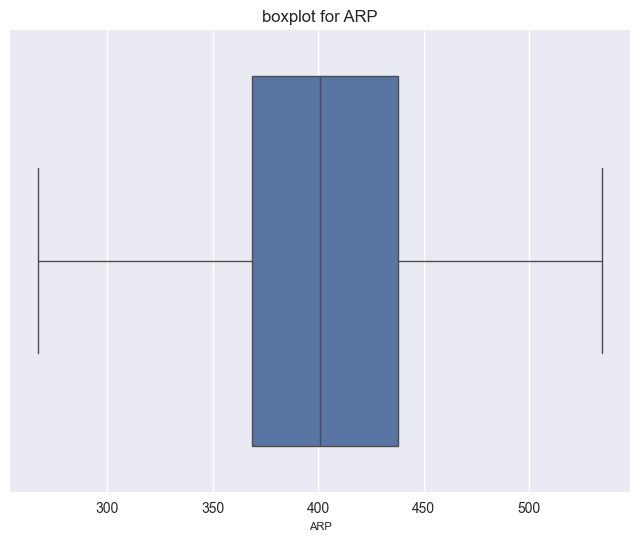

In [111]:
plt.figure(figsize = (8 , 6))

sns.boxplot( x = clean_loan_data["ARP"])

plt.title("boxplot for ARP")
plt.show()

In [112]:
clean_loan_data[num_cols].corr()["Status"].sort_values(ascending = False)

Status                  1.0000
LTV                     0.0896
DTI                     0.0834
LTC                     0.0832
Interest_rate_spread    0.0427
Credit_Score            0.0035
ID                      0.0034
ARP                     0.0023
rate_of_interest        0.0016
Upfront_charges        -0.0084
term                   -0.0114
income                 -0.0763
loan_amount            -0.0901
Interest Paid          -0.0916
Total payment          -0.0916
property_value         -0.1188
year                       NaN
Name: Status, dtype: float64

In [113]:
os.chdir("C:/Users/KISHORE/OneDrive/Desktop/B2  Data Science Internship  Enginow 💜/Project 3")

In [114]:
clean_loan_data.to_csv("bank_loan_data.csv", index = False)

### Feature Selection & Spliting dataset

In [115]:
sel_cols = ["LTV" ,"DTI","LTC","ARP","Interest_rate_spread","Credit_Score","Negative_Amortization","lump_sum_payment","credit_type","Coapplicant_Credit_Type","submission_of_application" , "Status"]

clean_loan_data = clean_loan_data[sel_cols]

In [116]:
x = clean_loan_data.iloc[: , :-1]
y = clean_loan_data.iloc[: , -1]

In [117]:
x.head()

,LTV,DTI,LTC,ARP,Interest_rate_spread,Credit_Score,Negative_Amortization,lump_sum_payment,credit_type,Coapplicant_Credit_Type,submission_of_application
0,98.7288,45.0000,0.9707,440.8773,0.9074,758,not_neg,not_lpsm,EXP,CIB,to_inst
1,82.2506,24.8547,0.8026,340.8835,0.4154,552,not_neg,lpsm,EQUI,EXP,to_inst
2,80.0197,46.0000,0.7993,456.1464,0.2000,834,neg_amm,not_lpsm,EXP,CIB,to_inst
3,69.3769,42.0000,0.6911,425.5527,0.6810,587,not_neg,not_lpsm,EXP,CIB,not_inst
4,91.8865,39.0000,0.9189,400.0000,0.3042,602,not_neg,not_lpsm,CRIF,EXP,not_inst


In [118]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Status, dtype: int64

In [119]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 42 , stratify = y)

In [120]:
encoder = OneHotEncoder(handle_unknown = "ignore")
encoder.fit(x_train)

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'ignore'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_categ

In [121]:
x_train_encoded = encoder.transform(x_train)
x_test_encoded = encoder.transform(x_test)

In [122]:
scaler = StandardScaler(with_mean=False)

# Fit on training data
x_train_scaled = scaler.fit_transform(x_train_encoded)

# Only transform test data
x_test_scaled = scaler.transform(x_test_encoded)


In [123]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [124]:
count =  Counter(y_train)
count

Counter({0: 70016, 1: 22417})

In [125]:
'''smote = BorderlineSMOTE(
    kind='borderline-1',
    random_state=42
)

x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)'''

"smote = BorderlineSMOTE(\n    kind='borderline-1',\n    random_state=42\n)\n\nx_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)"

In [126]:
'''count =  Counter(y_train_res)
count'''

'count =  Counter(y_train_res)\ncount'

In [127]:
kmeans_smote = KMeansSMOTE(
    k_neighbors = 5,
    cluster_balance_threshold = 0.1,
    kmeans_estimator = 30,
    random_state = 42
)

x_train_res , y_train_res = kmeans_smote.fit_resample(x_train_scaled , y_train)

#### Logistic Regression

In [128]:
lr = LogisticRegression(max_iter = 1000)

lr.fit(x_train_res , y_train_res)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [129]:
y_train_pred = lr.predict(x_train_res)
y_test_pred = lr.predict(x_test_scaled)

In [130]:
y_train_prob = lr.predict_proba(x_train_res)[: , 1] 
y_test_prob = lr.predict_proba(x_test_scaled)[: , 1]

In [131]:
print("Train accuracy : " , accuracy_score(y_train_res , y_train_pred))
print("Test accuracy : " , accuracy_score(y_test , y_test_pred))

Train accuracy :  1.0
Test accuracy :  0.7802347595607725


In [132]:
con_matrix = confusion_matrix(y_test , y_test_pred , labels = [0 , 1])
con_matrix

array([[30003,     4],
       [ 8702,   906]])

In [133]:
classification_report(y_test , y_test_pred , output_dict = True)

{'0': {'precision': 0.775171166515954,
  'recall': 0.9998666977705202,
  'f1-score': 0.8732972406566538,
  'support': 30007.0},
 '1': {'precision': 0.9956043956043956,
  'recall': 0.09429641965029142,
  'f1-score': 0.17227609811751282,
  'support': 9608.0},
 'accuracy': 0.7802347595607725,
 'macro avg': {'precision': 0.8853877810601748,
  'recall': 0.5470815587104058,
  'f1-score': 0.5227866693870833,
  'support': 39615.0},
 'weighted avg': {'precision': 0.8286338060484985,
  'recall': 0.7802347595607725,
  'f1-score': 0.7032755029937467,
  'support': 39615.0}}

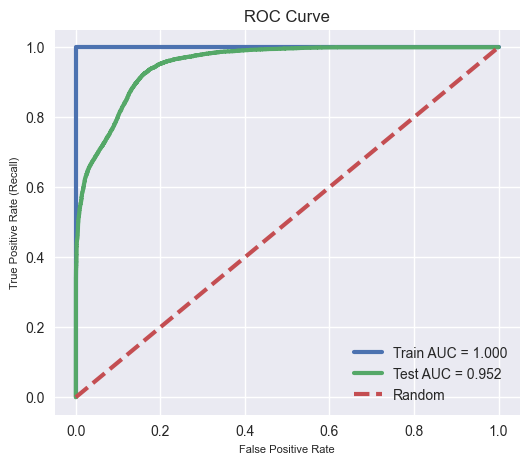

In [134]:
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_prob)
roc_auc_train = roc_auc_score(y_train_res, y_train_prob)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)


plt.figure(figsize=(6,5))

plt.plot(fpr_train, tpr_train, label=f"Train AUC = {roc_auc_train:.3f}")

plt.plot(fpr_test, tpr_test, label=f"Test AUC = {roc_auc_test:.3f}")

plt.plot([0, 1], [0, 1], linestyle='--', label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [135]:
dt = DecisionTreeClassifier(
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

dt.fit(x_train_res, y_train_res)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [136]:
y_train_pred = dt.predict(x_train_res)
y_test_pred = dt.predict(x_test_scaled)

In [137]:
y_train_prob = dt.predict_proba(x_train_res)[: , 1] 
y_test_prob = dt.predict_proba(x_test_scaled)[: , 1]

In [138]:
print("Train accuracy : " , accuracy_score(y_train_res , y_train_pred))
print("Test accuracy : " , accuracy_score(y_test , y_test_pred))

Train accuracy :  0.9140767824497258
Test accuracy :  0.8675501703900038


In [139]:
confusion_matrix(y_test , y_test_pred , labels = [0 , 1])

array([[29739,   268],
       [ 4979,  4629]])

In [140]:
classification_report(y_test , y_test_pred , output_dict = True)

{'0': {'precision': 0.8565873610231004,
  'recall': 0.9910687506248542,
  'f1-score': 0.9189339513325608,
  'support': 30007.0},
 '1': {'precision': 0.945272615887278,
  'recall': 0.48178601165695256,
  'f1-score': 0.6382626680455016,
  'support': 9608.0},
 'accuracy': 0.8675501703900038,
 'macro avg': {'precision': 0.9009299884551891,
  'recall': 0.7364273811409034,
  'f1-score': 0.7785983096890312,
  'support': 39615.0},
 'weighted avg': {'precision': 0.878096585527329,
  'recall': 0.8675501703900038,
  'f1-score': 0.8508615118570576,
  'support': 39615.0}}

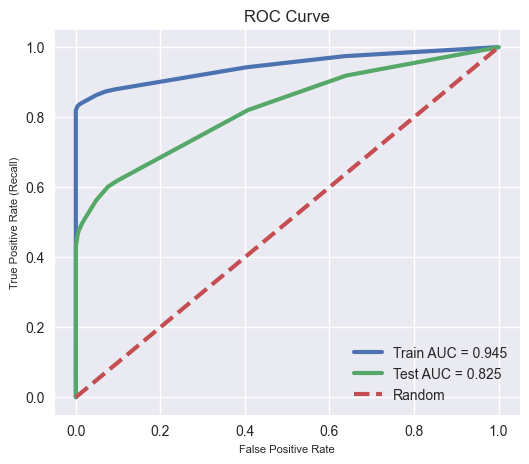

In [141]:
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_prob)
roc_auc_train = roc_auc_score(y_train_res, y_train_prob)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6,5))

plt.plot(fpr_train, tpr_train, label=f"Train AUC = {roc_auc_train:.3f}")

plt.plot(fpr_test, tpr_test, label=f"Test AUC = {roc_auc_test:.3f}")

plt.plot([0, 1], [0, 1], linestyle='--', label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [142]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train_res, y_train_res)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [143]:
y_train_pred = rf.predict(x_train_res)
y_test_pred = rf.predict(x_test_scaled)

In [144]:
y_train_prob = rf.predict_proba(x_train_res)[: , 1] 
y_test_prob = rf.predict_proba(x_test_scaled)[: , 1]

In [145]:
print("Train accuracy : " , accuracy_score(y_train_res , y_train_pred))
print("Test accuracy : " , accuracy_score(y_test , y_test_pred))

Train accuracy :  0.8905678702010968
Test accuracy :  0.833749842231478


In [146]:
confusion_matrix(y_test , y_test_pred , labels = [0 , 1])

array([[29669,   338],
       [ 6248,  3360]])

In [147]:
classification_report(y_test , y_test_pred , output_dict = True)

{'0': {'precision': 0.8260433777876771,
  'recall': 0.9887359616089579,
  'f1-score': 0.9000970814877738,
  'support': 30007.0},
 '1': {'precision': 0.9085992428339643,
  'recall': 0.34970857618651124,
  'f1-score': 0.5050353224109424,
  'support': 9608.0},
 'accuracy': 0.833749842231478,
 'macro avg': {'precision': 0.8673213103108207,
  'recall': 0.6692222688977346,
  'f1-score': 0.7025662019493581,
  'support': 39615.0},
 'weighted avg': {'precision': 0.846066014449667,
  'recall': 0.833749842231478,
  'f1-score': 0.8042810173400975,
  'support': 39615.0}}

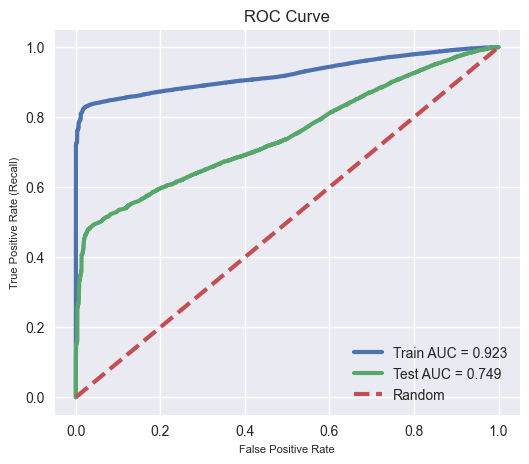

In [148]:
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_prob)
roc_auc_train = roc_auc_score(y_train_res, y_train_prob)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6,5))

plt.plot(fpr_train, tpr_train, label=f"Train AUC = {roc_auc_train:.3f}")

plt.plot(fpr_test, tpr_test, label=f"Test AUC = {roc_auc_test:.3f}")

plt.plot([0, 1], [0, 1], linestyle='--', label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [149]:
neg = (y_train_res == 0).sum()
pos = (y_train_res == 1).sum()

scale_pos_weight = neg / pos
print("Scale_pos_weight:", scale_pos_weight)

Scale_pos_weight: 1.0


In [150]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb.fit(x_train_res, y_train_res)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [151]:
y_train_pred = xgb.predict(x_train_res)
y_test_pred = xgb.predict(x_test_scaled)

In [152]:
y_train_prob = rf.predict_proba(x_train_res)[: , 1] 
y_test_prob = rf.predict_proba(x_test_scaled)[: , 1]

In [153]:
print("Train accuracy : " , accuracy_score(y_train_res , y_train_pred))
print("Test accuracy : " , accuracy_score(y_test , y_test_pred))

Train accuracy :  0.9166690470749543
Test accuracy :  0.8709832134292566


In [154]:
confusion_matrix(y_test , y_test_pred , labels = [0 , 1])

array([[29679,   328],
       [ 4783,  4825]])

In [155]:
classification_report(y_test , y_test_pred , output_dict = True)

{'0': {'precision': 0.8612094480877488,
  'recall': 0.9890692171826574,
  'f1-score': 0.9207215871193907,
  'support': 30007.0},
 '1': {'precision': 0.9363477585872307,
  'recall': 0.5021856786011657,
  'f1-score': 0.6537497459521713,
  'support': 9608.0},
 'accuracy': 0.8709832134292566,
 'macro avg': {'precision': 0.8987786033374898,
  'recall': 0.7456274478919116,
  'f1-score': 0.7872356665357809,
  'support': 39615.0},
 'weighted avg': {'precision': 0.8794330726561957,
  'recall': 0.8709832134292566,
  'f1-score': 0.8559717335302288,
  'support': 39615.0}}

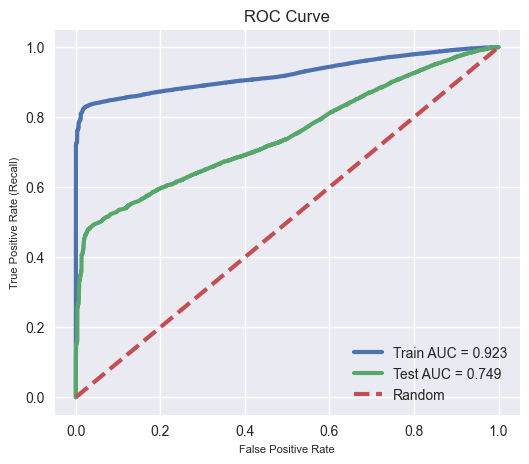

In [156]:
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_prob)
roc_auc_train = roc_auc_score(y_train_res, y_train_prob)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6,5))

plt.plot(fpr_train, tpr_train, label=f"Train AUC = {roc_auc_train:.3f}")

plt.plot(fpr_test, tpr_test, label=f"Test AUC = {roc_auc_test:.3f}")

plt.plot([0, 1], [0, 1], linestyle='--', label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Prediction New Borrower data

In [157]:
x_train.head()

,LTV,DTI,LTC,ARP,Interest_rate_spread,Credit_Score,Negative_Amortization,lump_sum_payment,credit_type,Coapplicant_Credit_Type,submission_of_application
6517,70.6876,41.0000,0.7060,375.1847,0.0054,805,not_neg,not_lpsm,CIB,EXP,not_inst
85851,47.9363,38.0000,0.4764,300.3099,-0.0503,650,not_neg,not_lpsm,CIB,CIB,to_inst
6711,76.3754,40.2216,0.7433,422.2160,1.1044,606,not_neg,not_lpsm,EQUI,EXP,to_inst
689,93.2390,42.0000,0.9324,512.5000,0.9368,640,not_neg,not_lpsm,EXP,EXP,to_inst
144279,77.5157,60.0000,0.7623,420.2946,0.3364,557,not_neg,not_lpsm,CRIF,EXP,to_inst


In [158]:
new = [61.36363636 , 45 , 0.6094947130887385 , 3.674969361539961 , 0.299286183 , 780 , "not_neg" , "not_lpsm"  , "EXP" , "EXP" , "to_inst"]

In [159]:
939789.239355 + 2840.40188

942629.641235

In [160]:
942629.641235 / 256500

3.674969361539961

In [161]:
encoded_new = encoder.transform([new])

In [162]:
scaled_new = scaler.transform(encoded_new)

In [163]:
print(scaled_new)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (1, 225130)>
  Coords	Values
  (0, 2137)	52.14995699929359
  (0, 18280)	5.746918422967501
  (0, 40716)	304.0296038395254
  (0, 199543)	304.0296038395254
  (0, 224997)	19.69140793174745
  (0, 225119)	3.346780319107568
  (0, 225121)	6.725199653074331
  (0, 225125)	2.2250868501137173
  (0, 225127)	2.000008095805103
  (0, 225129)	2.0861253460274054


In [164]:
y_train.unique()

array([0, 1])

In [165]:
lr.predict(scaled_new)

array([1])

In [166]:
xgb.predict(scaled_new)

array([0])

In [167]:
os.chdir("C:/Users/KISHORE/OneDrive/Desktop/B2  Data Science Internship  Enginow 💜/Project 3")

In [168]:
'''
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(xgb , "xgb_model.pkl")
'''

'\njoblib.dump(encoder, "encoder.pkl")\njoblib.dump(scaler, "scaler.pkl")\njoblib.dump(xgb , "xgb_model.pkl")\n'

## Model Comparison: Logistic Regression vs Decision Tree vs Random Forest vs XGBoost

### Overall Performance

| Model | Train Accuracy | Test Accuracy | Train AUC | Test AUC |
|-------|---------------|--------------|-----------|----------|
| Logistic Regression | 1.000 | 0.780 | 1.000 | 0.952 |
| Decision Tree | 0.914 | 0.868 | 0.945 | 0.825 |
| Random Forest | 0.891 | 0.834 | 0.923 | 0.749 |
| XGBoost | 0.917 | 0.871 | 0.923 | 0.749 |


---

### Test Accuracy Ranking

| Rank | Model | Test Accuracy |
|------|-------|--------------|
| 1 | **XGBoost** | **0.871** |
| 2 | Decision Tree | 0.868 |
| 3 | Random Forest | 0.834 |
| 4 | Logistic Regression | 0.780 |

---

### Key Insights

- **Logistic Regression**
  - High AUC but poor detection of Class 1
  - Overfitting

- **Random Forest**
  - Moderate performance

- **Decision Tree**
  - Good balance and strong Class 1 detection

- **XGBoost**
  - **Best overall Test Accuracy**
  - Good generalization (Train ≈ Test)
  - Best performing model overall


In [169]:
#clean_loan_data.to_csv("Loan_data.csv" , index = False)

## Business Recommendations

1. **Risk-Based Loan Approval**  
   Reject or send high-risk applicants for manual review based on high LTV, DTI, low credit score, or negative amortization.  
   This ensures loans are given only to customers with acceptable repayment capacity, reducing default probability.

2. **LTV & Loan Amount Control**  
   Cap Loan-to-Value (LTV) ratio at 75–80% to minimize risk of loss in case of default.  
   Reducing loan amounts for high-LTV customers protects the portfolio against market fluctuations in property value.

3. **Debt Burden Monitoring**  
   Approve loans only if Debt-to-Income (DTI) ≤ 40%, and consider longer tenure for high DTI customers.  
   This ensures borrowers can comfortably meet repayment obligations, reducing early delinquencies.

4. **Credit Score-Based Pricing**  
   Offer lower interest rates for high-score customers and stricter terms for low-score applicants.  
   This aligns pricing with risk and incentivizes low-risk customers to borrow, improving profitability.

5. **Interest Rate Spread Management**  
   Avoid excessive interest rate spreads for borderline-risk customers to prevent repayment stress.  
   Balanced rates maintain customer affordability while protecting the lender’s margin.

6. **High-Risk Flags**  
   Manually review cases with negative amortization, large lump sum payments, or risky co-applicant types.  
   Early detection of these flags prevents potential defaults and ensures careful underwriting.

7. **Upfront Charges Optimization**  
   Reduce or waive upfront charges for medium- and low-risk customers to reduce initial financial stress.  
   This improves customer satisfaction and decreases likelihood of early default.

8. **Early Warning & Monitoring System**  
   Track medium/high-risk customers post-disbursement and send reminders or restructuring options if needed.  
   Proactive monitoring helps prevent defaults and allows timely interventions.

9. **Portfolio Strategy**  
   Limit exposure to high LTV and low credit score segments and track defaults by loan type and application channel.  
   This ensures diversification and continuous monitoring of portfolio risk.

10. **Business Value**  
    Reduces Non-Performing Assets (NPA) and improves approval decision speed.  
    Enhances profitability and customer experience through risk-based lending and faster approvals.
